# **BDTs at work: the $\Omega$ analysis**

The goal of this tutorial is to provide an example of binary classification with machine learning techniques applied to an ALICE analysis. This tutorial is based on the measurement of the invariant mass of the $\mathrm{\Omega}$ , through its cascade decay channel $\mathrm{\Omega^-} \rightarrow \mathrm{\Lambda} + K^- \rightarrow p + \pi^- + K^-$. We will need two samples:
- Real data: Pb--Pb collisions at $s_{\sqrt{NN}} = 5.02$ TeV (LHC18qr, subsample)
- Anchored MC production: LHC21l5

At the end of the tutorial we will be able to see the peak of the $\mathrm{\Omega}$ !


<img src="img/omega_dec.png"
     align="center"
     width="500" />

#### First, we need some libraries ###

In [5]:
pip install numpy matplotlib pandas uproot scikit-learn keras tensorflow statsmodels seaborn

In [6]:
### standard sci-py libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot ### to read, convert, inspect ROOT TTrees

One tip before starting: to access the documentation associated to each function we are going to call just type Shift+Tab after the first parenthesis of the function

## Reading trees with uproot, handling them with pandas

Uproot (https://github.com/scikit-hep/uproot4) is a Python package that provides tools for reading/writing ROOT files using Python and Numpy (does not depend on ROOT) and is primarly intended to stream data into machine learning libraries in Python.

In [7]:
## first we have to download the trees

!curl -L https://cernbox.cern.ch/s/V05rgkoJfGe8x7K/download --output AnalysisResults-mc_reduced.root
!curl -L https://cernbox.cern.ch/s/ReP4m9tDJ6UfivD/download --output AnalysisResults_reduced.root

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  280M    0  280M    0     0  13.4M      0 --:--:--  0:00:20 --:--:-- 20.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  156M    0  156M    0     0  11.1M      0 --:--:--  0:00:14 --:--:-- 19.1M


In [8]:
import uproot
import pandas as pd  # Import the pandas library

# Rest of your code remains unchanged
#mc_file = uproot.open("/home/oem/repos/data/AnalysisResults_reduced.root")
#mc_file = uproot.open("/home/dragon/Downloads/whatsapp/AnalysisResults_reduced.root")
mc_file = uproot.open("AnalysisResults_reduced.root")

# Load the data from the "XiOmegaTree" TTree using NumPy arrays
numpy_mc = mc_file["XiOmegaTree"].arrays(library="np")
print(numpy_mc)


{'pt': array([2.95665407, 2.3375349 , 3.49518967, ..., 2.26300001, 2.51613331,
       1.20448875]), 'eta': array([-0.24762242,  0.51199478,  0.4818711 , ...,  0.30498117,
       -0.46781945,  0.53567749]), 'mass': array([1.6849823 , 1.68114889, 1.66029489, ..., 1.68542159, 1.65778661,
       1.66609097]), 'ct': array([1.38192141, 3.43563914, 1.15997505, ..., 6.18283606, 1.56888652,
       6.38890219]), 'radius': array([2.67890625, 4.9609375 , 2.08359375, ..., 7.44140625, 1.7859375 ,
       4.7625    ]), 'radiusV0': array([21.6296875 , 15.18046875, 25.4       , ..., 11.80703125,
       16.76796875, 10.31875   ]), 'dcaBachPV': array([0.22820313, 1.29976563, 0.14882813, ..., 0.18851562, 0.13890625,
       0.1984375 ]), 'dcaV0PV': array([0.15875   , 0.32742188, 0.73421875, ..., 1.83554688, 0.50601562,
       1.666875  ]), 'dcaV0piPV': array([2.54      , 2.54      , 2.54      , ..., 1.01203125, 0.86320312,
       2.54      ]), 'dcaV0prPV': array([0.8334375 , 1.24023438, 2.31179688, ..., 2.4

In [9]:
# Convert the NumPy arrays to a pandas DataFrame
AnalysisResults_reduced = pd.DataFrame(numpy_mc)
AnalysisResults_reduced

# Write the DataFrame to a CSV file
#df.to_csv("AnalysisResults-mc_reduced.csv", index=False)

,pt,eta,mass,ct,radius,radiusV0,dcaBachPV,dcaV0PV,dcaV0piPV,dcaV0prPV,...,bachBarCosPA,tpcClBach,tpcClV0Pr,tpcClV0Pi,centrality,matter,hasTOFhit,hasITSrefit,isOmega,index
0,2.956654,-0.247622,1.684982,1.381921,2.678906,21.629687,0.228203,0.158750,2.540000,0.833438,...,0.99990,122,89,116,0,True,True,True,True,0.001531
1,2.337535,0.511995,1.681149,3.435639,4.960938,15.180469,1.299766,0.327422,2.540000,1.240234,...,0.99992,129,107,94,5,False,False,False,True,0.001256
2,3.495190,0.481871,1.660295,1.159975,2.083594,25.400000,0.148828,0.734219,2.540000,2.311797,...,0.99990,131,144,125,9,True,True,False,True,0.001586
3,3.431005,-0.031064,1.655359,2.049352,4.464844,25.400000,0.585391,0.148828,2.540000,2.004219,...,0.99990,98,135,116,0,False,True,True,True,0.001742
4,1.702399,-0.580567,1.667960,1.677295,1.389062,5.258594,0.476250,0.525859,1.121172,0.982266,...,0.99990,133,151,143,6,True,False,True,True,0.001197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487477,1.577199,-0.472576,1.666047,2.535713,2.182812,25.400000,1.270000,0.476250,2.540000,2.540000,...,0.99990,111,142,124,0,True,False,False,True,0.001785
3487478,1.419298,-0.171253,1.649283,4.228776,3.075781,6.151562,0.932656,1.041797,2.540000,1.299766,...,0.99990,94,150,101,68,False,False,False,True,0.001681
3487479,2.263000,0.304981,1.685422,6.182836,7.441406,11.807031,0.188516,1.835547,1.012031,2.401094,...,0.99990,135,145,121,4,False,True,False,True,0.000393
3487480,2.516133,-0.467819,1.657787,1.568887,1.785937,16.767969,0.138906,0.506016,0.863203,0.506016,...,0.99990,94,120,131,4,False,True,False,True,0.001261


In [10]:
AnalysisResults_reduced.columns

Index(['pt', 'eta', 'mass', 'ct', 'radius', 'radiusV0', 'dcaBachPV', 'dcaV0PV',
       'dcaV0piPV', 'dcaV0prPV', 'dcaV0tracks', 'dcaBachV0', 'cosPA',
       'cosPAV0', 'V0invMassDelta', 'tpcNsigmaBach', 'tpcNsigmaV0Pr',
       'tpcNsigmaV0Pi', 'competingMass', 'bachBarCosPA', 'tpcClBach',
       'tpcClV0Pr', 'tpcClV0Pi', 'centrality', 'matter', 'hasTOFhit',
       'hasITSrefit', 'isOmega', 'index'],
      dtype='object')

# file  2


In [11]:
#mc_file2 = uproot.open("/home/oem/repos/data/AnalysisResults-mc_reduced.root")
#mc_file2 = uproot.open("/home/dragon/Downloads/whatsapp/AnalysisResults-mc_reduced.root")
mc_file2 = uproot.open("AnalysisResults-mc_reduced.root")

mc_file2.keys()

# Load the data from the "XiOmegaTree" TTree using NumPy arrays
numpy_mc2 = mc_file2["XiOmegaTree"].arrays(library="np")

# Print the data
print(numpy_mc2)


{'pt': array([3.43627572, 3.1503036 , 3.1503036 , ..., 0.98587209, 3.5488987 ,
       3.5488987 ]), 'eta': array([ 0.4304224 , -0.44923487, -0.44923487, ..., -0.21326731,
       -0.68127084, -0.68127084]), 'mass': array([1.35017145, 1.30052471, 1.30052471, ..., 1.29829669, 1.32010543,
       1.32010543]), 'ct': array([12.46815395,  0.97671664,  0.97671664, ...,  3.49920106,
       12.49555588, 12.49555588]), 'radius': array([25.4       ,  2.1828125 ,  2.1828125 , ...,  2.48046875,
        7.04453125,  7.04453125]), 'radiusV0': array([25.4      , 25.4      , 25.4      , ...,  4.365625 ,  7.7390625,
        7.7390625]), 'dcaBachPV': array([2.54      , 0.2778125 , 0.2778125 , ..., 0.62507813, 2.54      ,
       2.54      ]), 'dcaV0PV': array([0.46632812, 0.3175    , 0.3175    , ..., 0.873125  , 0.52585938,
       0.52585938]), 'dcaV0piPV': array([2.54, 2.54, 2.54, ..., 2.54, 2.54, 2.54]), 'dcaV0prPV': array([1.27992188, 2.19273438, 2.19273438, ..., 0.22820313, 0.29765625,
       0.2976562

In [12]:
# Convert the NumPy arrays to a pandas DataFrame
AnalysisResultsmc_reduced = pd.DataFrame(numpy_mc2)
AnalysisResultsmc_reduced
# Write the DataFrame to a CSV file
#AnalysisResults_mc_reduced.to_csv("AnalysisResults-mc_reduced.csv", index=False)

,pt,eta,mass,ct,radius,radiusV0,dcaBachPV,dcaV0PV,dcaV0piPV,dcaV0prPV,...,hasITSrefit,isOmega,ptMC,etaMC,ctMC,yMC,pdg,isReconstructed,flag,index
0,3.436276,0.430422,1.350171,12.468154,25.400000,25.400000,2.540000,0.466328,2.540000,1.279922,...,False,False,2.961429,-0.176302,3.144315,-0.153703,0,True,1,0.030335
1,3.150304,-0.449235,1.300525,0.976717,2.182812,25.400000,0.277813,0.317500,2.540000,2.192734,...,True,False,1.763839,0.372077,15.831111,0.300148,3312,False,1,0.062918
2,3.150304,-0.449235,1.300525,0.976717,2.182812,25.400000,0.277813,0.317500,2.540000,2.192734,...,True,False,1.712730,0.320456,4.392962,0.255281,-3312,False,1,0.099576
3,3.435864,-0.003711,1.308485,9.783530,25.400000,25.400000,0.823516,0.138906,2.540000,1.746250,...,True,False,4.034199,0.025677,0.990564,0.023720,0,True,1,0.083175
4,4.258953,0.133779,1.292546,2.277862,6.945312,15.676562,0.744141,0.109141,2.242344,0.654844,...,True,True,2.095031,-0.311874,6.342230,-0.264955,3312,False,1,0.082320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522270,4.702322,-0.141823,1.671497,2.102666,6.151562,25.400000,0.545703,0.436563,2.540000,1.309688,...,False,True,4.639276,-0.142932,2.773384,-0.134514,3334,True,1,0.066325
5522271,3.554836,-0.169863,1.292658,1.663820,4.762500,25.400000,0.228203,0.436563,2.540000,1.309688,...,True,False,4.639276,-0.142932,2.773384,-0.134514,0,True,1,0.025305
5522272,0.985872,-0.213267,1.298297,3.499201,2.480469,4.365625,0.625078,0.873125,2.540000,0.228203,...,True,False,4.639276,-0.142932,2.773384,-0.134514,0,True,1,0.093281
5522273,3.548899,-0.681271,1.320105,12.495556,7.044531,7.739062,2.540000,0.525859,2.540000,0.297656,...,False,False,3.797151,-0.425157,5.734587,-0.402757,-3312,False,1,0.080183


In [13]:
AnalysisResultsmc_reduced

,pt,eta,mass,ct,radius,radiusV0,dcaBachPV,dcaV0PV,dcaV0piPV,dcaV0prPV,...,hasITSrefit,isOmega,ptMC,etaMC,ctMC,yMC,pdg,isReconstructed,flag,index
0,3.436276,0.430422,1.350171,12.468154,25.400000,25.400000,2.540000,0.466328,2.540000,1.279922,...,False,False,2.961429,-0.176302,3.144315,-0.153703,0,True,1,0.030335
1,3.150304,-0.449235,1.300525,0.976717,2.182812,25.400000,0.277813,0.317500,2.540000,2.192734,...,True,False,1.763839,0.372077,15.831111,0.300148,3312,False,1,0.062918
2,3.150304,-0.449235,1.300525,0.976717,2.182812,25.400000,0.277813,0.317500,2.540000,2.192734,...,True,False,1.712730,0.320456,4.392962,0.255281,-3312,False,1,0.099576
3,3.435864,-0.003711,1.308485,9.783530,25.400000,25.400000,0.823516,0.138906,2.540000,1.746250,...,True,False,4.034199,0.025677,0.990564,0.023720,0,True,1,0.083175
4,4.258953,0.133779,1.292546,2.277862,6.945312,15.676562,0.744141,0.109141,2.242344,0.654844,...,True,True,2.095031,-0.311874,6.342230,-0.264955,3312,False,1,0.082320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522270,4.702322,-0.141823,1.671497,2.102666,6.151562,25.400000,0.545703,0.436563,2.540000,1.309688,...,False,True,4.639276,-0.142932,2.773384,-0.134514,3334,True,1,0.066325
5522271,3.554836,-0.169863,1.292658,1.663820,4.762500,25.400000,0.228203,0.436563,2.540000,1.309688,...,True,False,4.639276,-0.142932,2.773384,-0.134514,0,True,1,0.025305
5522272,0.985872,-0.213267,1.298297,3.499201,2.480469,4.365625,0.625078,0.873125,2.540000,0.228203,...,True,False,4.639276,-0.142932,2.773384,-0.134514,0,True,1,0.093281
5522273,3.548899,-0.681271,1.320105,12.495556,7.044531,7.739062,2.540000,0.525859,2.540000,0.297656,...,False,False,3.797151,-0.425157,5.734587,-0.402757,-3312,False,1,0.080183


In [14]:
AnalysisResultsmc_reduced.columns

Index(['pt', 'eta', 'mass', 'ct', 'radius', 'radiusV0', 'dcaBachPV', 'dcaV0PV',
       'dcaV0piPV', 'dcaV0prPV', 'dcaV0tracks', 'dcaBachV0', 'cosPA',
       'cosPAV0', 'V0invMassDelta', 'tpcNsigmaBach', 'tpcNsigmaV0Pr',
       'tpcNsigmaV0Pi', 'competingMass', 'bachBarCosPA', 'tpcClBach',
       'tpcClV0Pr', 'tpcClV0Pi', 'centrality', 'matter', 'hasTOFhit',
       'hasITSrefit', 'isOmega', 'ptMC', 'etaMC', 'ctMC', 'yMC', 'pdg',
       'isReconstructed', 'flag', 'index'],
      dtype='object')

In [15]:
AnalysisResultsmc_reduced =  AnalysisResultsmc_reduced.iloc[:200, :] # comment this line to run code with wholee data
AnalysisResults_reduced =  AnalysisResults_reduced.iloc[:200, :] # cpomment this line to run whole code with whole data


# ABOUT THE DATA



**1. pt (Transverse Momentum):** The transverse momentum, represented by the column "pt," encapsulates the momentum component perpendicular to the direction of motion of particles within a particle collision. In the context of our analysis, it's akin to the sideways force exerted on an object as it moves forward. Just as a car may experience a lateral push while traveling along a straight path, particles exhibit transverse momentum as they navigate through space within the collision environment. This momentum component is essential for understanding the trajectories and interactions of particles, contributing valuable insights into their behavior and properties during the collision process.

**2. eta (Pseudorapidity):** Pseudorapidity, denoted by the column "eta," serves as a measure of the angle of a particle's trajectory relative to the beam axis within a particle collider. It provides crucial information about the distribution of particles across different regions of the detector. Think of pseudorapidity as analogous to the inclination angle of an object on a slope. Just as the steepness of a hill affects the trajectory of a rolling ball, pseudorapidity influences the distribution of particles within the detector, impacting their observable characteristics and interactions during collision events.

**3. mass (Mass):** The mass column represents the amount of matter contained within particles participating in collision events. Similar to the weight of an object, mass indicates the intrinsic property defining the particle's resistance to changes in motion. In our analysis, mass serves as a fundamental parameter for characterizing particle properties and interactions. Much like how the weight of an object determines its behavior under gravitational forces, particle mass influences their trajectories, decay patterns, and interactions within the collision environment, offering valuable insights into their underlying properties and behavior.

**4. ct (Decay Length):** Decay length, as indicated by the "ct" column, measures the distance traveled by particles before undergoing decay processes. It's akin to the distance covered by a thrown object before hitting the ground. Within the context of particle physics, decay length provides essential information about the stability and lifetime of particles, influencing their observable signatures and detection probabilities within the experimental setup. Understanding decay lengths enables researchers to infer crucial details about particle lifetimes, decay modes, and underlying interaction mechanisms, contributing to our comprehension of fundamental particle properties and behavior.

**5. radius (Radius):** The radius column denotes the distance from the center to the edge of a particle's trajectory within the detector. Similar to the radius of a circle, it characterizes the size and spatial extent of particle trajectories observed during collision events. Understanding particle radii provides insights into their spatial distribution and interaction patterns within the detector environment. Much like how the radius of a circular object defines its size and boundary, particle radii delineate the spatial boundaries of particle trajectories, aiding in the identification and classification of particles based on their observable signatures.

**6. radiusV0 (Radius V0):** RadiusV0 signifies the radius of a specific region of interest within the particle collision environment. Analogous to the radius of a target area within a larger space, it delineates a distinct region within the detector where specific particle interactions or decay processes are of interest. By focusing on the radiusV0 region, researchers can zoom in on specific particle interactions or phenomena, enabling targeted analysis and investigation of underlying processes. This localized perspective offers valuable insights into the dynamics and characteristics of particles within the designated region, enhancing our understanding of particle interactions and properties within the broader collision environment.

**7. dcaBachPV (Distance of Closest Approach to Bachelor Particle Primary Vertex):** The dcaBachPV column represents the closest distance between a particle track and the primary vertex associated with the bachelor particle. It's analogous to the minimum separation between two entities within the particle collision environment. This parameter provides essential information about the spatial relationships between particles and primary vertices, offering insights into particle trajectories and interaction patterns. Similar to how the distance between two points defines their spatial proximity, dcaBachPV quantifies the proximity between particle tracks and primary vertices, aiding in the characterization and classification of particle interactions within the detector.

**8. dcaV0PV (Distance of Closest Approach to V0 Particle Primary Vertex):** DcaV0PV measures the closest distance between a particle track and the primary vertex associated with the V0 particle. It's akin to the shortest distance between a particle's trajectory and a reference point within the collision environment. This parameter provides crucial information about the spatial relationship between particles and primary vertices, enabling researchers to infer valuable insights into particle trajectories and interaction dynamics. Much like how the distance between two points defines their spatial relationship, dcaV0PV quantifies the proximity between particle tracks and V0 particle primary vertices, facilitating the analysis and interpretation of particle interactions within the experimental setup.

**9. dcaV0piPV (Distance of Closest Approach to V0 Pion Primary Vertex):** The dcaV0piPV column denotes the closest distance between a particle track and the primary vertex associated with the V0 pion. It's similar to the minimum separation between two points within the particle collision environment. This parameter provides essential information about the spatial relationships between particles and primary vertices, offering insights into particle trajectories and interaction patterns. Much like how the distance between two points defines their spatial proximity, dcaV0piPV quantifies the proximity between particle tracks and primary vertices, aiding in the characterization and classification of particle interactions within the detector.

**10. dcaV0prPV (Distance of Closest Approach to V0 Proton Primary Vertex):** DcaV0prPV measures the closest distance between a particle track and the primary vertex associated with the V0 proton. It's similar to the shortest distance between a particle's trajectory and a reference point within the collision environment. This parameter provides crucial information about the spatial relationship between particles and primary vertices, enabling researchers to infer valuable insights into particle trajectories and interaction dynamics. Much like how the distance between two points defines their spatial relationship, dcaV0prPV quantifies the proximity between particle tracks and V0 particle primary vertices, facilitating the analysis and interpretation of particle interactions within the experimental setup.

# Data Cleaning and Preprocessing:  

## SIMULATED DATA

### 1. MISSING VALUES

The message "No missing values found in the DataFrame" indicates that after examining each column in the DataFrame `AnalysisResultsmc_reduced`, no missing values were detected. This suggests that all data entries in the DataFrame have been properly populated, with no null or NaN values present. It implies that the dataset is complete and ready for analysis without the need for additional data imputation or cleaning steps.

In [16]:
# Check for missing values in each column
missing_values = AnalysisResultsmc_reduced.isna().sum()

# Display the columns with missing values, if any
columns_with_missing_values = missing_values[missing_values > 0]
if not columns_with_missing_values.empty:
    print("Columns with missing values:")
    print(columns_with_missing_values)
else:
    print("No missing values found in the DataFrame.")


No missing values found in the DataFrame.


### 2. outliers, and inconsistencies.

               pt         eta        mass          ct      radius    radiusV0  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     2.863229    0.006060    1.402629    4.613819    6.985000   18.309828   
std      1.136862    0.402462    0.153518    6.175131    7.236549    7.814986   
min      0.590740   -0.761292    1.292472    0.218568    0.694531    1.389062   
25%      2.141668   -0.366629    1.310143    1.460309    2.133203   10.566797   
50%      2.755957   -0.002852    1.322191    2.867674    4.067969   20.935156   
75%      3.568556    0.359639    1.350295    4.761800    8.259961   25.400000   
max      6.682316    0.768885    1.701161   56.439045   25.400000   25.400000   

        dcaBachPV     dcaV0PV   dcaV0piPV   dcaV0prPV  ...   tpcClV0Pr  \
count  200.000000  200.000000  200.000000  200.000000  ...  200.000000   
mean     1.071215    0.556568    1.944886    0.935930  ...  111.135000   
std      0.895683    0.608527    0.797589    0.7

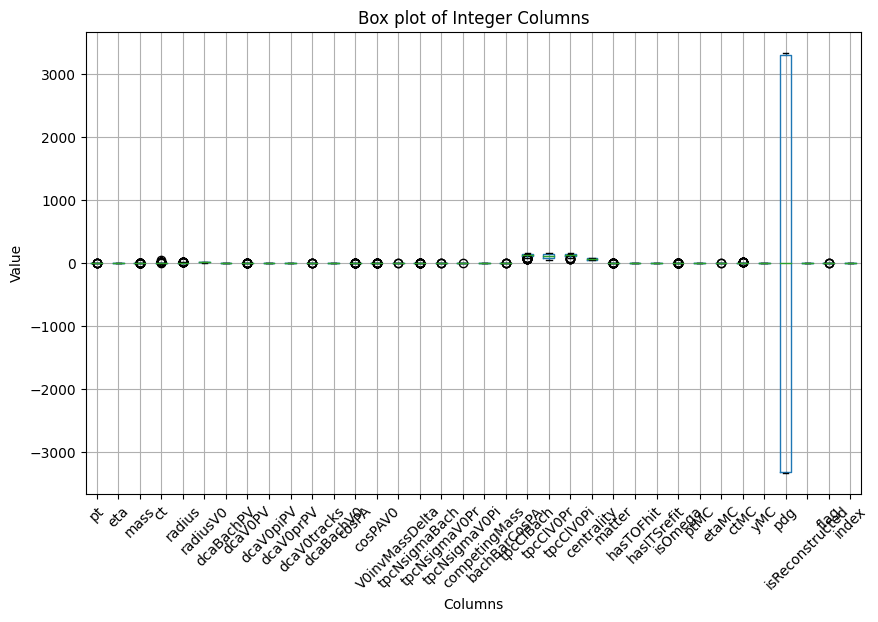

In [17]:
# Filter columns with integer values
integer_columns = AnalysisResultsmc_reduced.select_dtypes(exclude='object').columns

# Create a new DataFrame with only integer columns
AnalysisResultsmc_reduced_integer = AnalysisResultsmc_reduced[integer_columns]

# Descriptive statistics
integer_describe = AnalysisResultsmc_reduced_integer.describe()
print(integer_describe)

# Box plot for each integer column
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
AnalysisResultsmc_reduced_integer.boxplot()
plt.title('Box plot of Integer Columns')
plt.ylabel('Value')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()


In [18]:
# Filter columns with integer values
integer_columns = AnalysisResultsmc_reduced.select_dtypes(exclude='object').columns

# Create a new DataFrame with only integer columns
AnalysisResultsmc_reduced_integer = AnalysisResultsmc_reduced[integer_columns]

from scipy.stats import zscore

# Calculate z-score for each value in integer columns
z_scores = AnalysisResultsmc_reduced_integer.apply(zscore)

# Define threshold for outlier detection
threshold = 3

# Find outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Display outliers
print("Outliers:")
print(outliers)


Outliers:
        pt    eta   mass     ct  radius  radiusV0  dcaBachPV  dcaV0PV  \
0    False  False  False  False   False     False      False    False   
1    False  False  False  False   False     False      False    False   
2    False  False  False  False   False     False      False    False   
3    False  False  False  False   False     False      False    False   
4    False  False  False  False   False     False      False    False   
..     ...    ...    ...    ...     ...       ...        ...      ...   
195  False  False  False  False   False     False      False    False   
196  False  False  False  False   False     False      False    False   
197  False  False  False  False   False     False      False    False   
198  False  False  False  False   False     False      False    False   
199  False  False  False  False   False     False      False    False   

     dcaV0piPV  dcaV0prPV  ...  hasITSrefit  isOmega   ptMC  etaMC   ctMC  \
0        False      False  ...      

### 3. STANDERDIZATION AND NORMALIZATION

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the data
standardized_data = scaler.fit_transform(AnalysisResultsmc_reduced)
# Assuming standardized_data is the standardized array and AnalysisResultsmc_reduced is the DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=AnalysisResultsmc_reduced.columns)

standardized_df

,pt,eta,mass,ct,radius,radiusV0,dcaBachPV,dcaV0PV,dcaV0piPV,dcaV0prPV,...,hasITSrefit,isOmega,ptMC,etaMC,ctMC,yMC,pdg,isReconstructed,flag,index
0,0.505325,1.057062,-0.342557,1.275122,2.551107,0.909530,1.643964,-0.148664,0.748013,0.462323,...,-1.603567,-0.538816,0.519047,-0.361480,-0.147989,-0.505358,-0.027020,1.564697,-0.123404,-0.693143
1,0.253148,-1.134111,-0.666761,-0.590470,-0.665267,0.909530,-0.888030,-0.393849,0.748013,1.689140,...,0.623610,-0.538816,-0.459040,0.736524,3.293232,0.924706,1.058114,-0.639101,-0.123404,0.402026
2,0.253148,-1.134111,-0.666761,-0.590470,-0.665267,0.909530,-0.888030,-0.393849,0.748013,1.689140,...,0.623610,-0.538816,-0.500782,0.633165,0.190699,0.783334,-1.112154,-0.639101,-0.123404,1.634203
3,0.504962,-0.024337,-0.614776,0.839283,2.551107,0.909530,-0.277242,-0.688071,0.748013,1.089067,...,0.623610,-0.538816,1.395192,0.042937,-0.732182,0.053695,-0.027020,1.564697,-0.123404,1.082913
4,1.230779,0.318141,-0.718863,-0.379234,-0.005498,-0.337796,-0.366084,-0.737108,0.373882,-0.377780,...,0.623610,1.855921,-0.188551,-0.632931,0.719427,-0.855907,1.058114,-0.639101,-0.123404,1.054168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.536042,0.695542,1.746396,-0.665855,-0.733993,-1.839679,-0.932451,-0.328466,-1.858436,0.982387,...,0.623610,-0.538816,-0.037045,-0.597971,-0.779587,-0.826519,1.058114,-0.639101,-0.123404,-0.391522
196,1.536042,0.695542,1.746396,-0.665855,-0.733993,-1.839679,-0.932451,-0.328466,-1.858436,0.982387,...,0.623610,-0.538816,-0.033108,-0.832093,-0.258682,-1.076878,1.065322,-0.639101,-0.123404,-1.621820
197,0.678040,-0.069246,-0.519435,1.892791,2.551107,0.909530,0.255809,2.139729,0.748013,0.222294,...,-1.603567,-0.538816,1.068785,-0.049502,3.406014,-0.081722,1.058114,1.564697,-0.123404,-0.485600
198,-1.396474,0.102844,1.875632,-0.490205,-0.816464,-2.170602,-0.532663,-0.508268,-0.711099,-1.057863,...,0.623610,1.855921,0.047941,0.887155,-0.214672,1.144954,-1.119363,-0.639101,-0.123404,-1.183738


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the standardized data
normalized_data = scaler.fit_transform(standardized_df)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=AnalysisResultsmc_reduced.columns)
normalized_df


,pt,eta,mass,ct,radius,radiusV0,dcaBachPV,dcaV0PV,dcaV0piPV,dcaV0prPV,...,hasITSrefit,isOmega,ptMC,etaMC,ctMC,yMC,pdg,isReconstructed,flag,index
0,0.467126,0.778808,0.141182,0.217885,1.000000,1.000000,1.000000,0.164,1.000000,0.481633,...,0.0,0.0,0.581999,0.378293,0.172534,0.387725,0.500000,1.0,0.0,0.303499
1,0.420181,0.203935,0.019705,0.013485,0.060241,1.000000,0.102362,0.104,1.000000,0.857143,...,1.0,0.0,0.334035,0.524492,0.872999,0.731261,0.996701,0.0,0.0,0.629596
2,0.420181,0.203935,0.019705,0.013485,0.060241,1.000000,0.102362,0.104,1.000000,0.857143,...,1.0,0.0,0.323452,0.510729,0.241474,0.697300,0.003299,0.0,0.0,0.996488
3,0.467059,0.495094,0.039183,0.170133,1.000000,1.000000,0.318898,0.032,1.000000,0.673469,...,1.0,0.0,0.804119,0.432141,0.053621,0.522023,0.500000,1.0,0.0,0.832337
4,0.602178,0.584946,0.000182,0.036629,0.253012,0.595041,0.287402,0.020,0.877551,0.224490,...,1.0,1.0,0.402609,0.342149,0.349098,0.303515,0.996701,0.0,0.0,0.823778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.659006,0.683960,0.923904,0.005226,0.040161,0.107438,0.086614,0.120,0.146939,0.640816,...,1.0,0.0,0.441019,0.346804,0.043971,0.310575,0.996701,0.0,0.0,0.393309
196,0.659006,0.683960,0.923904,0.005226,0.040161,0.107438,0.086614,0.120,0.146939,0.640816,...,1.0,0.0,0.442017,0.315631,0.150002,0.250433,1.000000,0.0,0.0,0.026976
197,0.499279,0.483312,0.074907,0.285558,1.000000,1.000000,0.507874,0.724,1.000000,0.408163,...,0.0,0.0,0.721368,0.419832,0.895956,0.489493,0.996701,1.0,0.0,0.365297
198,0.113085,0.528461,0.972328,0.024471,0.016064,0.000000,0.228346,0.076,0.522449,0.016327,...,1.0,1.0,0.462564,0.544548,0.158960,0.784169,0.000000,0.0,0.0,0.157419


## 2. REAL DATA

### 1.MISSING VALUES

In [21]:
# Check for missing values in each column AnalysisResults_reduced
missing_values = AnalysisResults_reduced.isna().sum()

# Display the columns with missing values, if any
columns_with_missing_values = missing_values[missing_values > 0]
if not columns_with_missing_values.empty:
    print("Columns with missing values:")
    print(columns_with_missing_values)
else:
    print("No missing values found in the DataFrame.")

No missing values found in the DataFrame.


### 2. OUTLIERS AND INCONCISTSNECIES

               pt         eta        mass          ct      radius    radiusV0  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     2.360537    0.009780    1.673039    3.374451    4.447977   16.299656   
std      0.701217    0.350726    0.017943    2.254320    2.973471    8.469630   
min      1.059420   -0.605851    1.642848    0.546586    0.992188    3.373437   
25%      1.885494   -0.294359    1.657452    1.775430    2.282031    7.416602   
50%      2.274138    0.018395    1.673771    2.585301    3.571875   16.023828   
75%      2.784567    0.328622    1.689538    4.872285    5.432227   25.400000   
max      5.505394    0.669423    1.701565    9.688820   21.530469   25.400000   

        dcaBachPV     dcaV0PV   dcaV0piPV   dcaV0prPV  ...  tpcNsigmaBach  \
count  200.000000  200.000000  200.000000  200.000000  ...     200.000000   
mean     0.666601    0.949077    1.895277    0.940197  ...      -1.059570   
std      0.618063    0.730087    0.8130

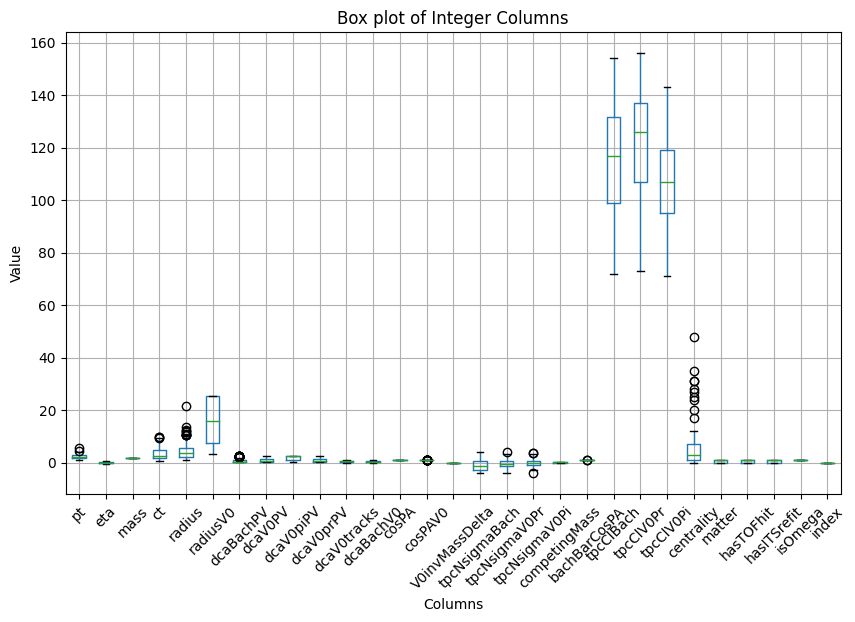

Outliers:
        pt    eta   mass     ct  radius  radiusV0  dcaBachPV  dcaV0PV  \
0    False  False  False  False   False     False      False    False   
1    False  False  False  False   False     False      False    False   
2    False  False  False  False   False     False      False    False   
3    False  False  False  False   False     False      False    False   
4    False  False  False  False   False     False      False    False   
..     ...    ...    ...    ...     ...       ...        ...      ...   
195  False  False  False  False   False     False      False    False   
196  False  False  False  False   False     False      False    False   
197  False  False  False  False   False     False      False    False   
198  False  False  False  False   False     False      False    False   
199  False  False  False  False   False     False      False    False   

     dcaV0piPV  dcaV0prPV  ...  bachBarCosPA  tpcClBach  tpcClV0Pr  tpcClV0Pi  \
0        False      False  ...  

In [22]:

# Filter columns with integer values
integer_columns = AnalysisResults_reduced.select_dtypes(exclude='object').columns

# Create a new DataFrame with only integer columns
AnalysisResults_reduced_integer = AnalysisResults_reduced[integer_columns]

# Descriptive statistics
integer_describe = AnalysisResults_reduced_integer.describe()
print(integer_describe)

# Box plot for each integer column
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
AnalysisResults_reduced_integer.boxplot()
plt.title('Box plot of Integer Columns')
plt.ylabel('Value')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()




# Filter columns with integer values
integer_columns = AnalysisResults_reduced.select_dtypes(exclude='object').columns

# Create a new DataFrame with only integer columns
AnalysisResults_reduced_integer = AnalysisResults_reduced[integer_columns]

from scipy.stats import zscore

# Calculate z-score for each value in integer columns
z_scores = AnalysisResults_reduced_integer.apply(zscore)

# Define threshold for outlier detection
threshold = 3

# Find outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Display outliers
print("Outliers:")
print(outliers)


### 3. STANDARDIZATION AND NORMALIZATION

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the data
standardized_data = scaler.fit_transform(AnalysisResults_reduced)
# Assuming standardized_data is the standardized array and AnalysisResults_reduced is the DataFrame
standardized_df_real = pd.DataFrame(standardized_data, columns=AnalysisResults_reduced.columns)

standardized_df_real



,pt,eta,mass,ct,radius,radiusV0,dcaBachPV,dcaV0PV,dcaV0piPV,dcaV0prPV,...,bachBarCosPA,tpcClBach,tpcClV0Pr,tpcClV0Pi,centrality,matter,hasTOFhit,hasITSrefit,isOmega,index
0,0.852251,-0.735755,0.667316,-0.886090,-0.596444,0.630890,-0.711090,-1.085227,0.794976,-0.153917,...,-0.086127,0.308684,-1.610824,0.581123,-0.775840,0.868554,0.750000,0.670280,0.0,0.895156
1,-0.032886,1.435522,0.453130,0.027211,0.172945,-0.132473,1.027004,-0.853618,0.794976,0.432570,...,3.372497,0.657480,-0.719635,-0.738929,-0.008441,-1.151339,-1.333333,-1.491914,0.0,0.431945
2,1.622179,1.349417,-0.712052,-0.984790,-0.797154,1.077164,-0.839837,-0.295030,0.794976,1.977463,...,-0.086127,0.757136,1.112253,1.121144,0.605478,0.868554,0.750000,-1.491914,0.0,0.987663
3,1.530416,-0.116749,-0.987835,-0.589279,0.005687,1.077164,-0.131725,-1.098852,0.794976,1.534022,...,-0.086127,-0.887187,0.666659,0.581123,-0.775840,-1.151339,0.750000,0.670280,0.0,1.251886
4,-0.940921,-1.687438,-0.283761,-0.754735,-1.031316,-1.306878,-0.308753,-0.581136,-0.954510,0.060651,...,-0.086127,0.856792,1.458826,2.201187,0.145038,0.868554,-1.333333,0.670280,0.0,0.333352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.026982,-1.250137,0.028862,0.889143,1.042690,0.607402,1.477621,0.386175,0.794976,0.704357,...,-0.086127,1.454727,-1.858376,1.301152,-0.008441,-1.151339,-1.333333,0.670280,0.0,0.912479
196,-1.319408,0.564381,0.925195,1.098496,0.039139,1.077164,-0.453594,1.912074,0.794976,2.306468,...,-0.086127,1.056104,1.013232,0.581123,-0.622360,0.868554,0.750000,0.670280,0.0,0.291429
197,-1.246468,0.712306,-1.384282,-0.768864,-1.098220,-0.942812,-0.389220,-0.635632,0.794976,-0.640272,...,-0.086127,-0.588219,0.270575,-1.758970,-0.161921,-1.151339,0.750000,0.670280,0.0,-1.671143
198,-1.174345,-0.404913,1.306649,-0.568989,-0.864058,-1.271645,-0.566248,-0.240533,0.794976,0.675748,...,-0.086127,0.657480,0.567638,-1.698967,-0.315401,0.868554,-1.333333,0.670280,0.0,-0.439488


In [24]:

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the standardized data
normalized_data = scaler.fit_transform(standardized_df_real)

# Convert the normalized data back to a DataFrame
normalized_df_real = pd.DataFrame(normalized_data, columns=AnalysisResults_reduced.columns)
normalized_df_real

,pt,eta,mass,ct,radius,radiusV0,dcaBachPV,dcaV0PV,dcaV0piPV,dcaV0prPV,...,bachBarCosPA,tpcClBach,tpcClV0Pr,tpcClV0Pi,centrality,matter,hasTOFhit,hasITSrefit,isOmega,index
0,0.426731,0.280903,0.717580,0.091371,0.082126,0.828829,0.052846,0.020408,1.000000,0.271186,...,0.000000,0.609756,0.192771,0.625000,0.000000,1.0,1.0,1.0,0.0,0.776120
1,0.287477,0.876553,0.652294,0.316012,0.193237,0.536036,0.491870,0.089796,1.000000,0.444915,...,0.251232,0.695122,0.409639,0.319444,0.104167,0.0,0.0,0.0,0.0,0.636520
2,0.547860,0.852932,0.297135,0.067094,0.053140,1.000000,0.020325,0.257143,1.000000,0.902542,...,0.000000,0.719512,0.855422,0.750000,0.187500,1.0,1.0,0.0,0.0,0.803999
3,0.533423,0.450716,0.213074,0.164376,0.169082,1.000000,0.199187,0.016327,1.000000,0.771186,...,0.000000,0.317073,0.746988,0.625000,0.000000,0.0,1.0,1.0,0.0,0.883629
4,0.144620,0.019827,0.427682,0.123680,0.019324,0.085586,0.154472,0.171429,0.388889,0.334746,...,0.000000,0.743902,0.939759,1.000000,0.125000,1.0,0.0,1.0,0.0,0.606807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.296896,0.139792,0.522973,0.528018,0.318841,0.819820,0.605691,0.461224,1.000000,0.525424,...,0.000000,0.890244,0.132530,0.791667,0.104167,0.0,0.0,1.0,0.0,0.781341
196,0.085075,0.637572,0.796184,0.579511,0.173913,1.000000,0.117886,0.918367,1.000000,1.000000,...,0.000000,0.792683,0.831325,0.625000,0.020833,1.0,1.0,1.0,0.0,0.594172
197,0.096550,0.678152,0.092233,0.120205,0.009662,0.225225,0.134146,0.155102,1.000000,0.127119,...,0.000000,0.390244,0.650602,0.083333,0.083333,0.0,1.0,1.0,0.0,0.002705
198,0.107897,0.371664,0.912455,0.169367,0.043478,0.099099,0.089431,0.273469,1.000000,0.516949,...,0.000000,0.695122,0.722892,0.097222,0.062500,1.0,0.0,1.0,0.0,0.373893


# EDA
## simulated data

               pt         eta        mass          ct      radius    radiusV0  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.373054    0.501479    0.269537    0.078179    0.254618    0.704711   
std      0.186629    0.263017    0.375636    0.109838    0.292913    0.325476   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.254602    0.257920    0.043238    0.022087    0.058233    0.382231   
50%      0.355444    0.495655    0.072718    0.047120    0.136546    0.814050   
75%      0.488842    0.732550    0.141486    0.080811    0.306225    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        dcaBachPV     dcaV0PV   dcaV0piPV   dcaV0prPV  tpcNsigmaBach  \
count  200.000000  200.000000  200.000000  200.000000     200.000000   
mean     0.417185    0.200380    0.755184    0.340122       0.468574   
std      0.355408    0.245327    0.328110    0.306853 

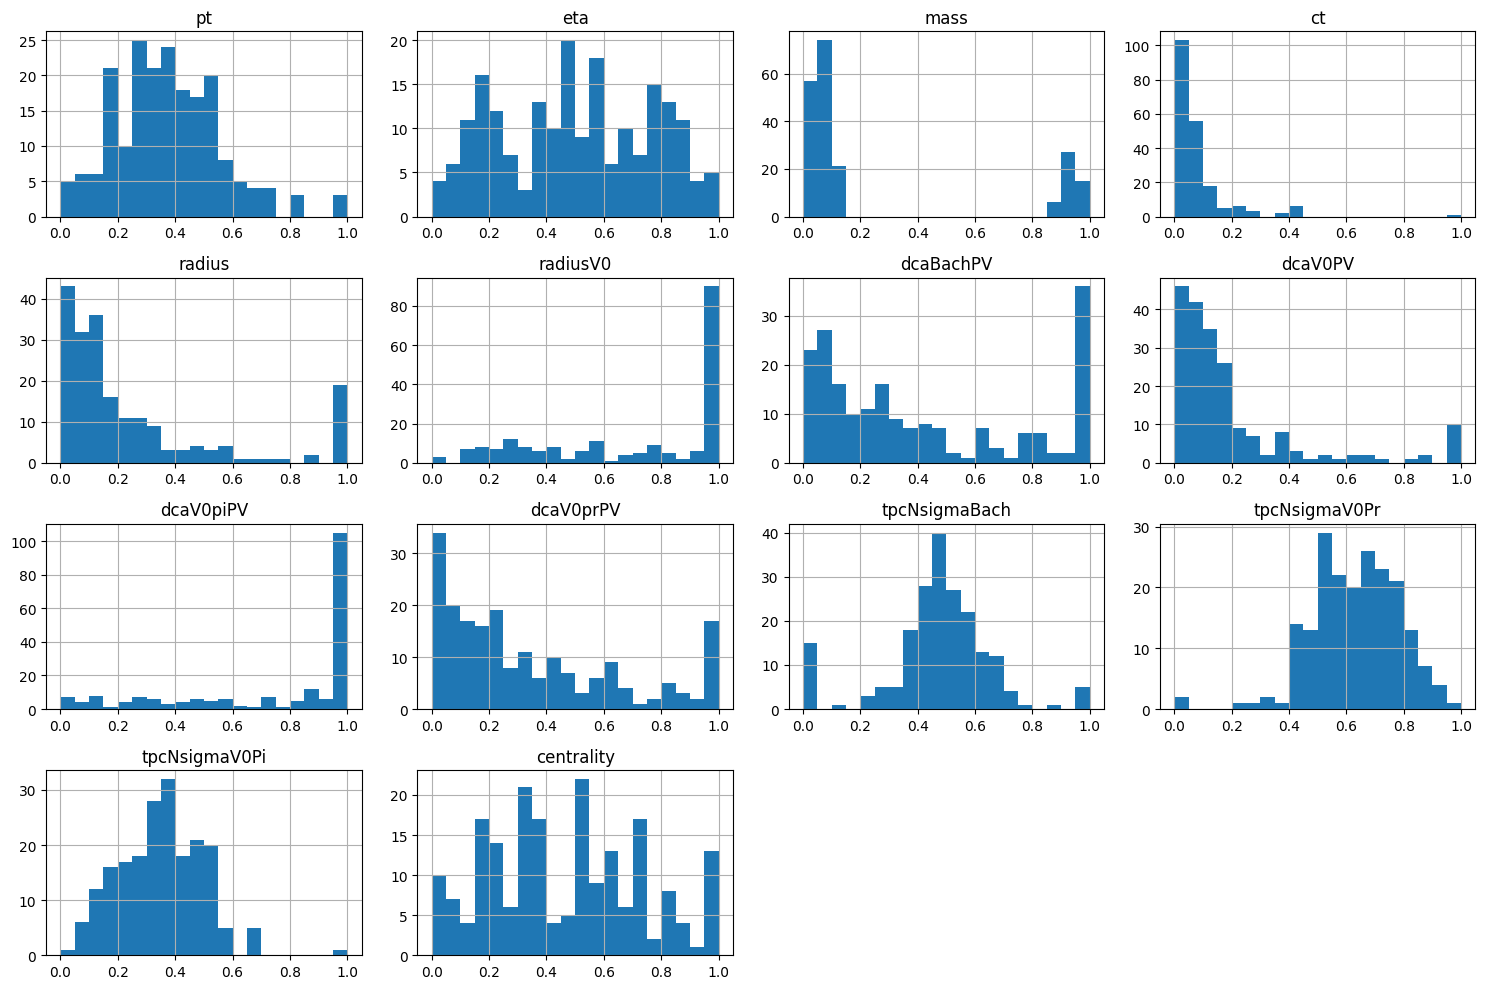

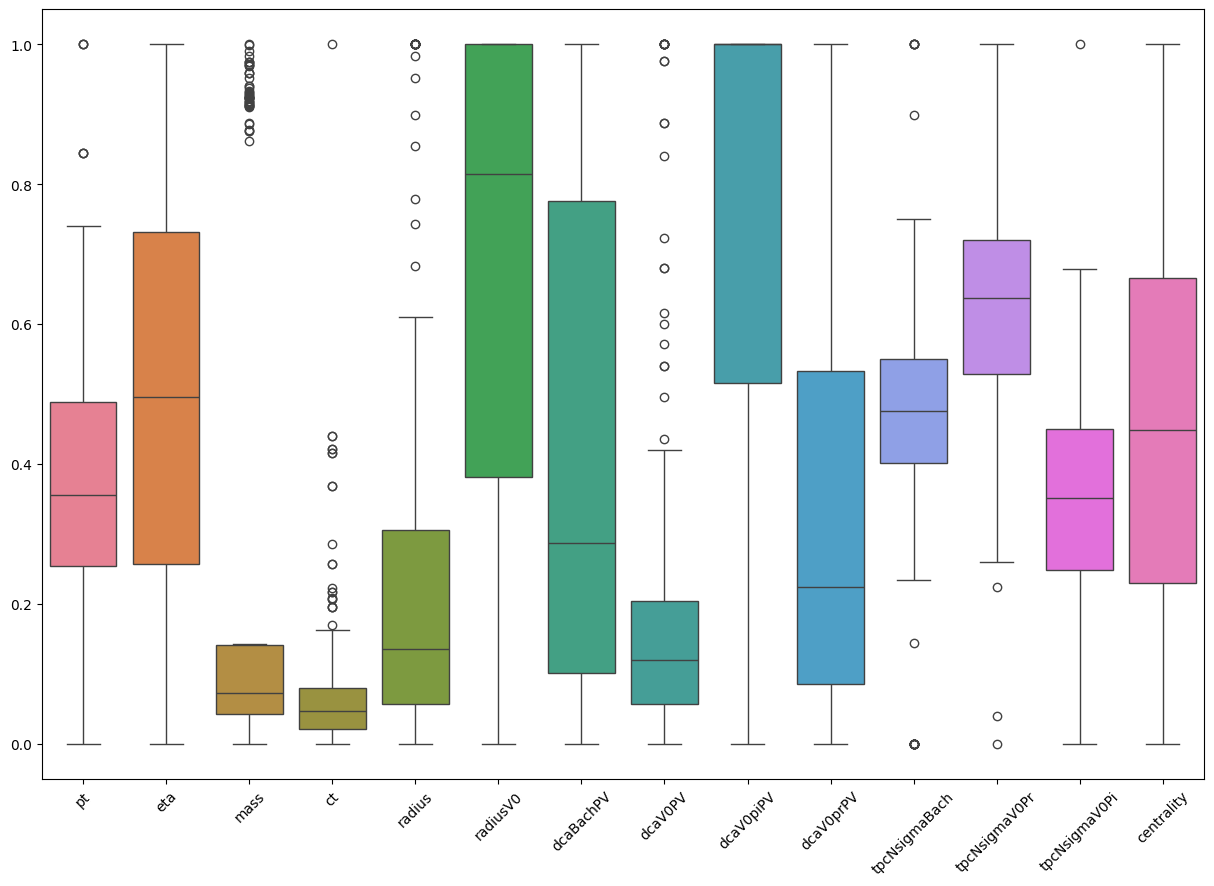

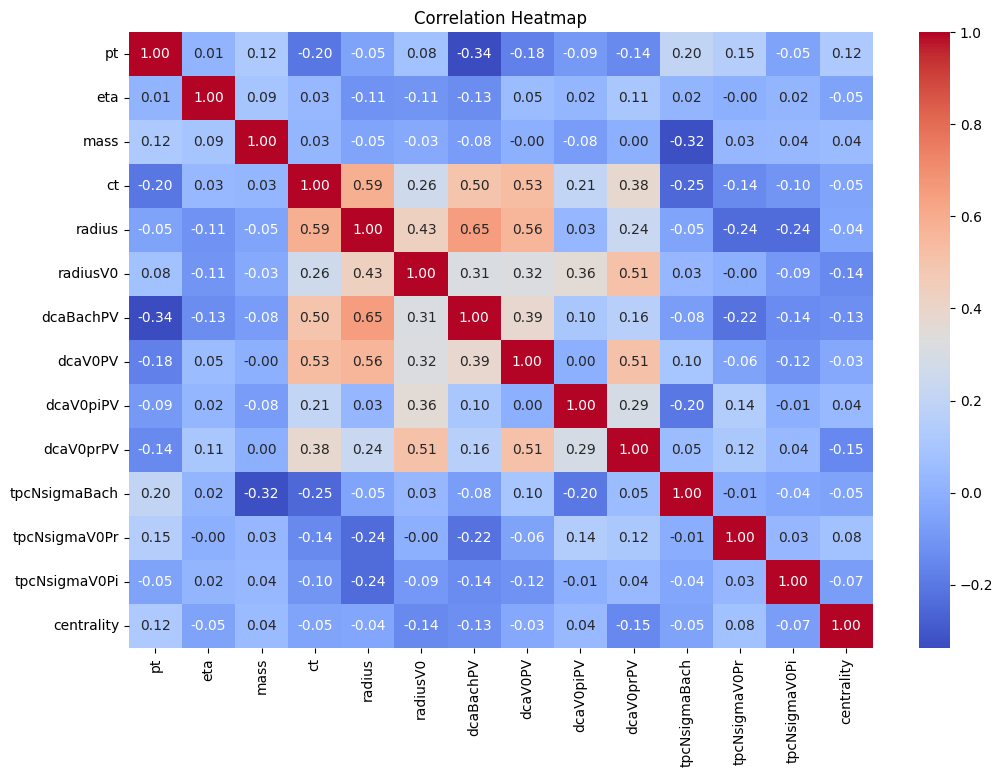

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset of columns for EDA (you can modify this list based on your specific requirements)
columns_subset = ['pt', 'eta', 'mass', 'ct', 'radius', 'radiusV0', 'dcaBachPV', 'dcaV0PV', 'dcaV0piPV',
                  'dcaV0prPV', 'tpcNsigmaBach', 'tpcNsigmaV0Pr', 'tpcNsigmaV0Pi', 'centrality']

# Descriptive statistics
print(normalized_df[columns_subset].describe())

# Histograms
normalized_df[columns_subset].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=normalized_df[columns_subset])
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
correlation_matrix = normalized_df[columns_subset].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## REAL DATA

               pt         eta        mass          ct      radius    radiusV0  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.292651    0.482744    0.514176    0.309319    0.168261    0.586847   
std      0.157720    0.275020    0.305575    0.246583    0.144777    0.384519   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.185803    0.244255    0.248714    0.134414    0.062802    0.183559   
50%      0.273217    0.489500    0.526651    0.223000    0.125604    0.574324   
75%      0.388024    0.732763    0.795169    0.473156    0.216184    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        dcaBachPV     dcaV0PV   dcaV0piPV   dcaV0prPV  tpcNsigmaBach  \
count  200.000000  200.000000  200.000000  200.000000     200.000000   
mean     0.232459    0.345531    0.722308    0.316780       0.368842   
std      0.253223    0.300341    0.350186    0.296963 

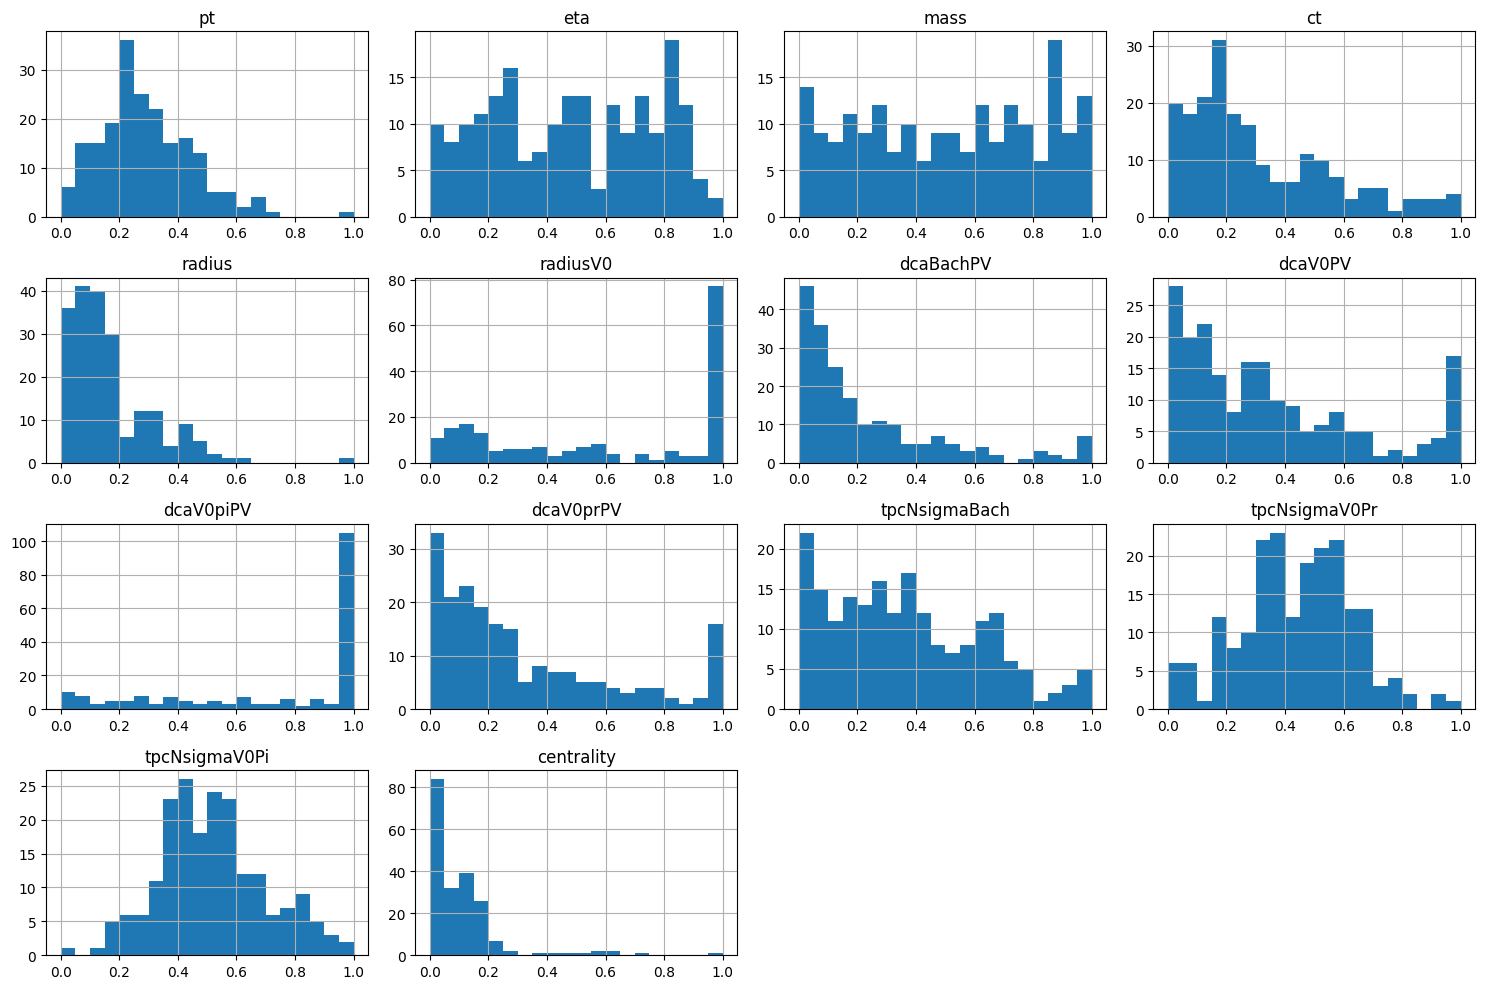

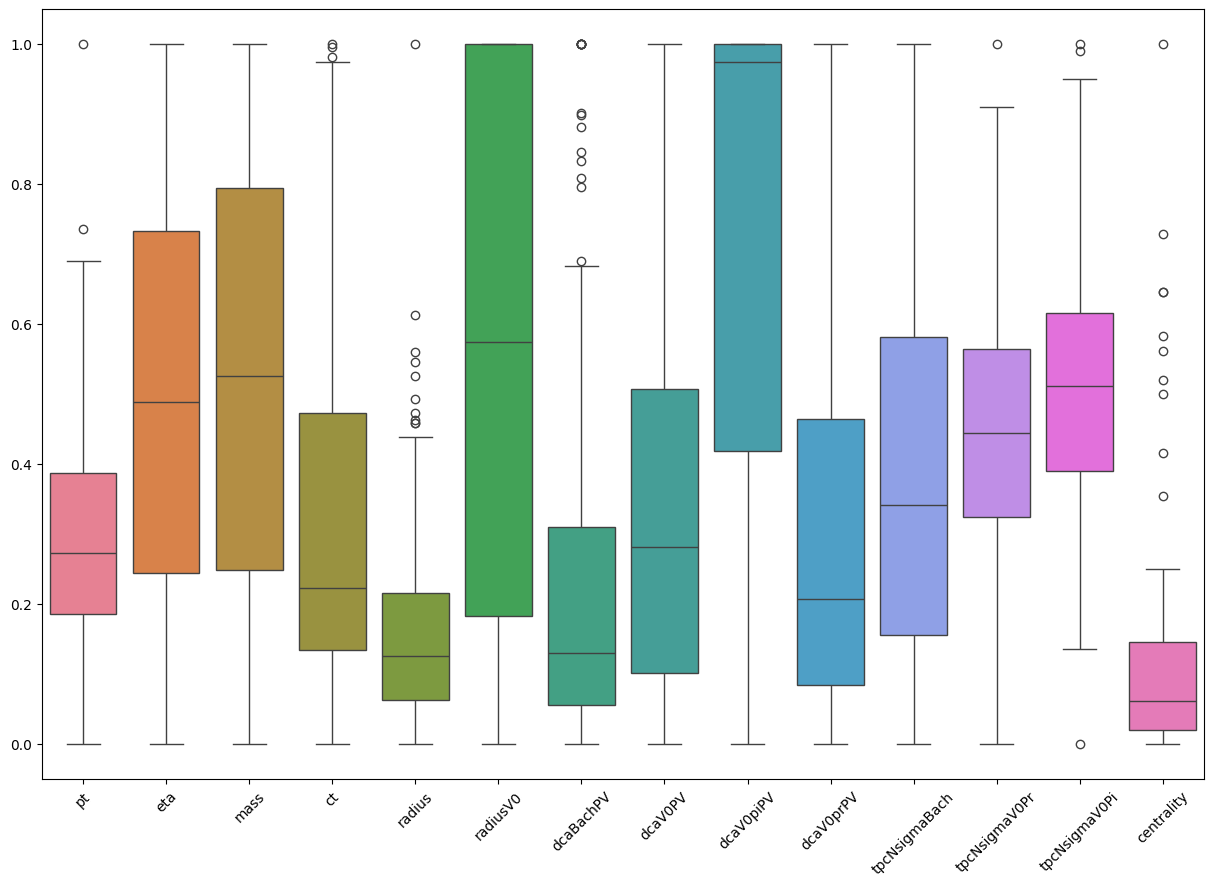

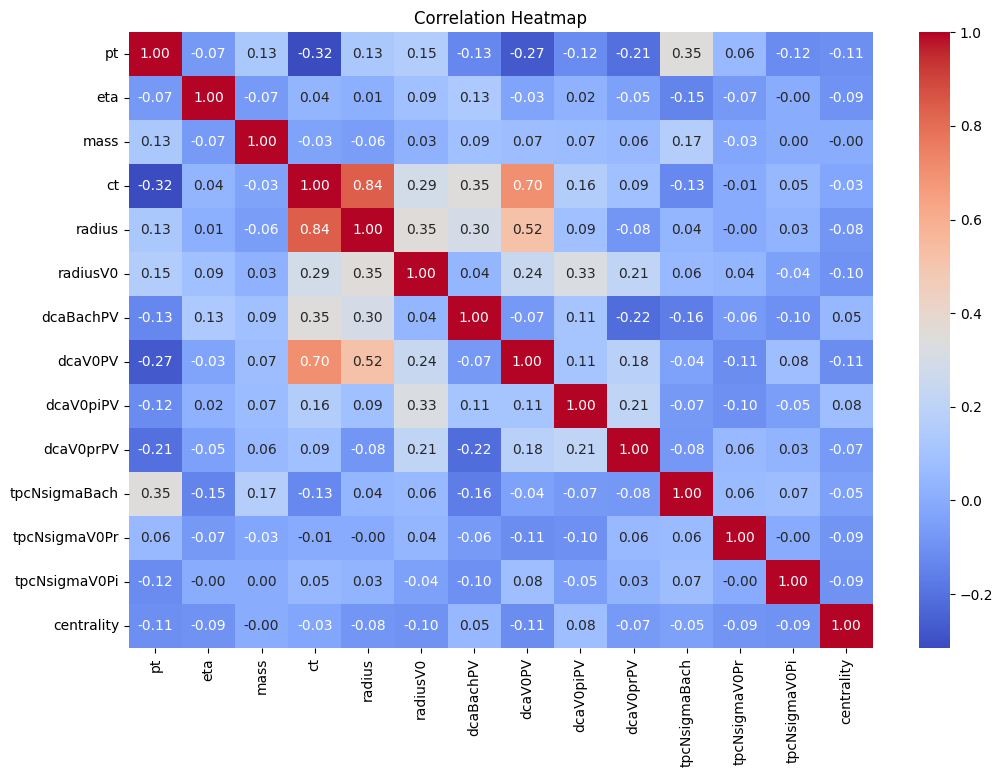

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset of columns for EDA (you can modify this list based on your specific requirements)
columns_subset = ['pt', 'eta', 'mass', 'ct', 'radius', 'radiusV0', 'dcaBachPV', 'dcaV0PV', 'dcaV0piPV',
                  'dcaV0prPV', 'tpcNsigmaBach', 'tpcNsigmaV0Pr', 'tpcNsigmaV0Pi', 'centrality']

# Descriptive statistics
print(normalized_df_real[columns_subset].describe())

# Histograms
normalized_df_real[columns_subset].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=normalized_df_real[columns_subset])
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
correlation_matrix = normalized_df_real[columns_subset].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Model Selection:
##  Model Training and Evaluation:

### 1. Simulated data

#### 1.Random Forest:

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into features (X) and target variable (y)
X = normalized_df.drop(columns=['index'])
y = normalized_df['index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Evaluate the model
random_forest_score = random_forest_model.score(X_test, y_test)
print("Random Forest Score:", random_forest_score)


Random Forest Score: -0.10735847231295992


## model plot

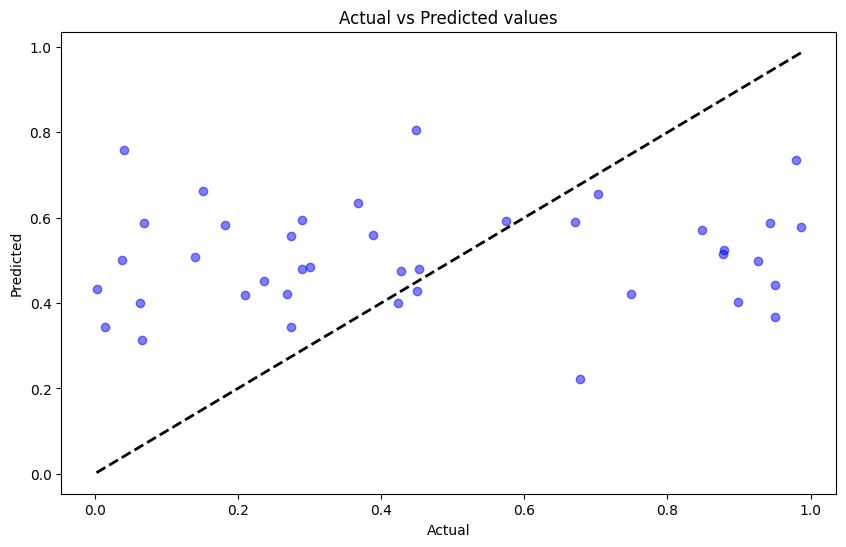

In [28]:
import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predictions on test data
y_pred = random_forest_model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values')
plt.show()


### RF hyper parameter tuing

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, n_jobs=1)


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
best_model_score = best_model.score(X_test, y_test)
print("Best Random Forest Score:", best_model_score)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Best Random Forest Score: -0.09364252608897394


#### 2. Support Vector Machine (SVM):

In [30]:
from sklearn.svm import SVR

# Initialize and train the SVM model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Evaluate the model
svm_score = svm_model.score(X_test, y_test)
print("SVM Score:", svm_score)


SVM Score: -0.22176056635862174


##3 model plot

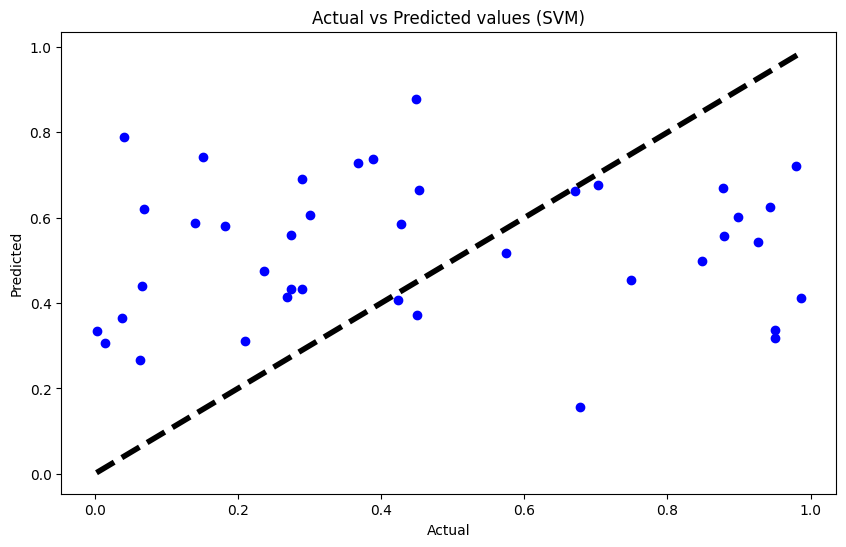

In [31]:
import matplotlib.pyplot as plt

# Predictions on test data
y_pred_svm = svm_model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svm, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values (SVM)')
plt.show()


#### hyper paramter tuning

In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Initialize the grid search
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=1)


# Fit the grid search to the data
grid_search_svm.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search_svm.best_params_)


Best Hyperparameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


#### 3.gradient boosting  

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)

# Evaluate the model
gradient_boosting_score = gradient_boosting_model.score(X_test, y_test)
print("Gradient Boosting Score:", gradient_boosting_score)


Gradient Boosting Score: -0.34033222075309766


### model plot

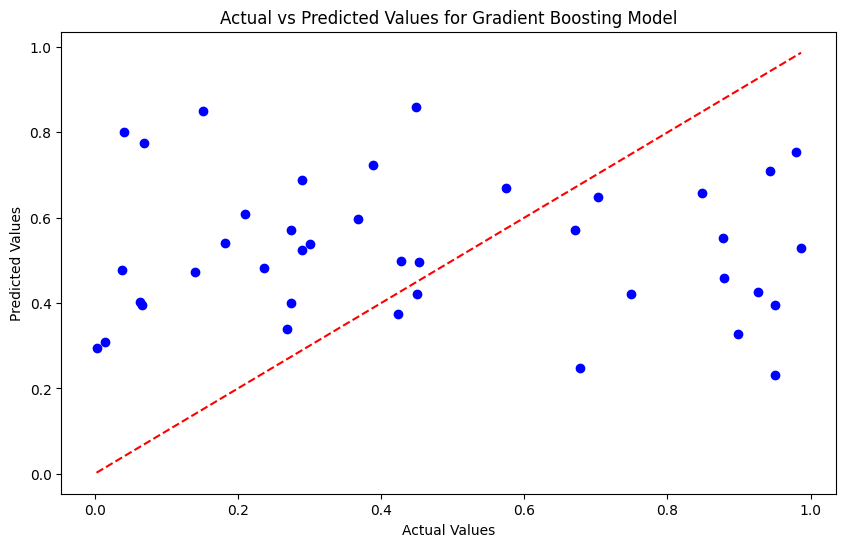

In [34]:
import matplotlib.pyplot as plt

# Predictions on test data
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gradient_boosting, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Gradient Boosting Model')
plt.show()


#### hyper parameter tuning

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search_gradient_boosting = GridSearchCV(estimator=gradient_boosting_model, param_grid=param_grid, cv=5, n_jobs=1)

# Fit the grid search to the data
grid_search_gradient_boosting.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search_gradient_boosting.best_params_)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


#### 4. Multilayer Perceptron (Neural Network):

In [36]:
from sklearn.neural_network import MLPRegressor

# Initialize and train the MLP model
mlp_model = MLPRegressor()
mlp_model.fit(X_train, y_train)

# Evaluate the model
mlp_score = mlp_model.score(X_test, y_test)
print("Multilayer Perceptron Score:", mlp_score)


Multilayer Perceptron Score: -0.40538001590072326


### model plot

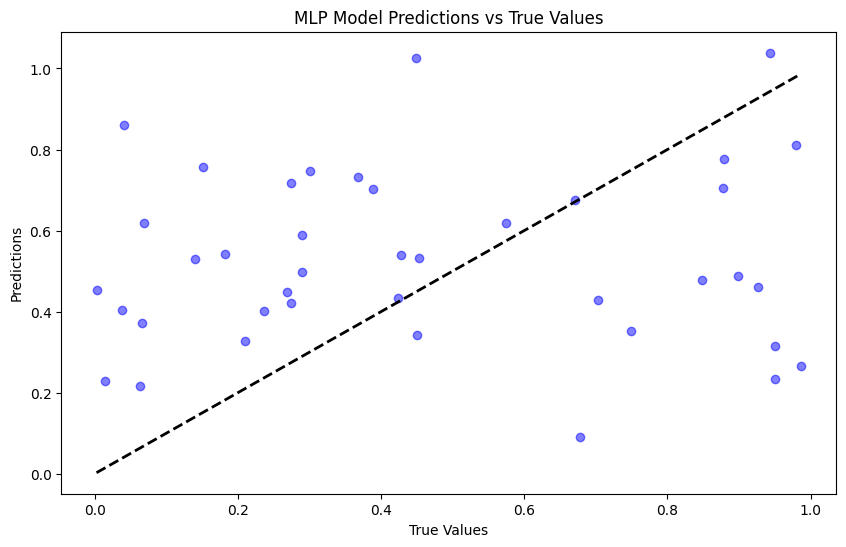

In [37]:
import matplotlib.pyplot as plt

# Predictions
y_pred = mlp_model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('MLP Model Predictions vs True Values')
plt.show()


### hyper paramter tuning

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize the MLP regressor
mlp_model = MLPRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=5, verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Best model
best_model = grid_search.best_estimator_

# Evaluate the best model
best_model_score = best_model.score(X_test, y_test)
print("Best Model Score:", best_model_score)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=relu, alp

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(150,), learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(150,), learning_rate=constant, solver=adam; total time=   0.2s


### Uncertainty Quantification Techniques:

##### 1. Monte Carlo dropout

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np

# Define and compile the model with Monte Carlo dropout
def create_mc_dropout_model():
    model = Sequential([
        Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train the model with Monte Carlo dropout
mc_dropout_model = create_mc_dropout_model()
mc_dropout_model.fit(X_train, y_train, epochs=100, batch_size=32,
                     validation_data=(X_test, y_test),
                     callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

# Generate predictions with Monte Carlo dropout
n_samples = 100
mc_dropout_predictions = np.stack([mc_dropout_model.predict(X_test) for _ in range(n_samples)])

# Calculate uncertainty using standard deviation of predictions
mc_dropout_uncertainty = np.std(mc_dropout_predictions, axis=0)

# Calculate mean prediction
mean_prediction = np.mean(mc_dropout_predictions, axis=0)

# Evaluate the model
mc_dropout_score = mc_dropout_model.evaluate(X_test, y_test)
print("Multilayer Perceptron (Monte Carlo Dropout) Score:", mc_dropout_score)

# Print uncertainty metrics
print("MC Dropout Uncertainty:\n", mc_dropout_uncertainty)
print("\nMean Prediction:\n", mean_prediction)

### models plot

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(y_test)), mean_prediction.flatten(), yerr=mc_dropout_uncertainty.flatten(), fmt='o', label='Predictions with Uncertainty')
plt.plot(y_test, label='True Values', color='red')
plt.xlabel('Samples')
plt.ylabel('Target Variable')
plt.title('Monte Carlo Dropout Predictions with Uncertainty')
plt.legend()
plt.show()


##### 2. bayesiam omference

In [ ]:
from sklearn.linear_model import BayesianRidge

# Initialize and train the Bayesian Ridge Regression model
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)

# Evaluate the model
bayesian_score = bayesian_model.score(X_test, y_test)
print("Bayesian Ridge Regression Score:", bayesian_score)

# Predictions
bayesian_predictions = bayesian_model.predict(X_test)

# Calculate uncertainty using standard deviation
bayesian_uncertainty = np.std(bayesian_predictions)

# Calculate mean prediction
bayesian_mean_prediction = np.mean(bayesian_predictions)

# Print uncertainty metrics
print("Bayesian Uncertainty:", bayesian_uncertainty)
print("Bayesian Mean Prediction:", bayesian_mean_prediction)


### model plot

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(y_test)), bayesian_predictions, yerr=bayesian_uncertainty, fmt='o', label='Predictions with Uncertainty')
plt.plot(y_test, label='True Values', color='red')
plt.xlabel('Samples')
plt.ylabel('Target Variable')
plt.title('Bayesian Ridge Regression Predictions with Uncertainty')
plt.legend()
plt.show()


##### 3. ensemble       

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Evaluate the model
random_forest_score = random_forest_model.score(X_test, y_test)
print("Random Forest Regressor Score:", random_forest_score)

# Predictions
random_forest_predictions = random_forest_model.predict(X_test)

# Calculate uncertainty using standard deviation
random_forest_uncertainty = np.std(random_forest_predictions)

# Calculate mean prediction
random_forest_mean_prediction = np.mean(random_forest_predictions)

# Print uncertainty metrics
print("Random Forest Uncertainty:", random_forest_uncertainty)
print("Random Forest Mean Prediction:", random_forest_mean_prediction)


### model plot

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(y_test)), random_forest_predictions, yerr=random_forest_uncertainty, fmt='o', label='Predictions with Uncertainty')
plt.plot(y_test, label='True Values', color='red')
plt.xlabel('Samples')
plt.ylabel('Target Variable')
plt.title('Random Forest Regressor Predictions with Uncertainty')
plt.legend()
plt.show()

### 4. deep snemble

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Define the function to create the neural network model
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Initialize an empty list to store the ensemble models and predictions
ensemble_models = []
ensemble_predictions = []

# Define the number of ensemble models
num_models = 5

# Create and train multiple models
for _ in range(num_models):
    # Create a new instance of the model
    model = create_model()

    # Train the model on the training data
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Add the trained model to the ensemble
    ensemble_models.append(model)

    # Make predictions using the trained model
    predictions = model.predict(X_test)

    # Append predictions to the list of ensemble predictions
    ensemble_predictions.append(predictions)

# Compute uncertainty as the standard deviation of predictions
ensemble_predictions_array = np.array(ensemble_predictions)
uncertainty = np.std(ensemble_predictions_array, axis=0)

# Evaluate the uncertainty score
ensemble_uncertainty_score = np.mean(uncertainty)
print("Deep Ensemble Uncertainty Score:", ensemble_uncertainty_score)

# Average the predictions from all models
final_predictions = np.mean(ensemble_predictions_array, axis=0)

# Evaluate the ensemble performance
ensemble_score = tf.keras.metrics.mean_squared_error(y_test, final_predictions).numpy()
print("Deep Ensemble Score:", ensemble_score)

### plot model

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot actual values
plt.scatter(y_test, final_predictions, color='blue', label='Actual')

# Plot predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Predicted')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


####  5. pistemic, and aleatoric uncertainty decomposition

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Define the function to create the neural network model
def create_model():
    inputs = keras.layers.Input(shape=(X_train.shape[1],))
    hidden1 = keras.layers.Dense(64, activation='relu')(inputs)
    hidden2 = keras.layers.Dense(64, activation='relu')(hidden1)
    # Output layer for mean prediction
    mean_output = keras.layers.Dense(1)(hidden2)
    # Output layer for variance prediction (using softplus activation)
    variance_output = keras.layers.Dense(1, activation='softplus')(hidden2)
    model = keras.Model(inputs=inputs, outputs=[mean_output, variance_output])
    model.compile(optimizer='adam', loss='mse')
    return model

# Initialize an empty list to store the ensemble models and predictions
ensemble_models = []
ensemble_predictions = []

# Define the number of ensemble models
num_models = 10

# Create and train multiple models
for _ in range(num_models):
    # Create a new instance of the model
    model = create_model()

    # Train the model on the training data
    model.fit(X_train, [y_train, y_train], epochs=10, batch_size=32, verbose=0)

    # Add the trained model to the ensemble
    ensemble_models.append(model)

    # Make predictions using the trained model
    predictions = model.predict(X_test)

    # Append predictions to the list of ensemble predictions
    ensemble_predictions.append(predictions)

# Compute ensemble mean and variance predictions
ensemble_predictions_array = np.array(ensemble_predictions)
mean_predictions = np.mean(ensemble_predictions_array[:, 0, :], axis=0)
variance_predictions = np.mean(ensemble_predictions_array[:, 1, :], axis=0)

# Compute aleatoric and epistemic uncertainties
aleatoric_uncertainty = np.mean(variance_predictions)
epistemic_uncertainty = np.mean(np.var(ensemble_predictions_array[:, 0, :], axis=0))

# Evaluate the uncertainties
print("Aleatoric Uncertainty:", aleatoric_uncertainty)
print("Epistemic Uncertainty:", epistemic_uncertainty)


In [ ]:
# Flatten predictions
mean_predictions_flat = mean_predictions.flatten()
variance_predictions_flat = variance_predictions.flatten()

# Plotting
plt.figure(figsize=(10, 6))

# Plot true values
plt.scatter(range(len(y_test)), y_test, color='red', label='True Values')

# Plot mean predictions
plt.plot(mean_predictions_flat, label='Mean Predictions', color='blue')

# Plot uncertainty (e.g., standard deviation)
plt.fill_between(range(len(y_test)), mean_predictions_flat - np.sqrt(variance_predictions_flat),
                 mean_predictions_flat + np.sqrt(variance_predictions_flat), color='gray', alpha=0.3, label='Uncertainty')

plt.xlabel('Samples')
plt.ylabel('Target Variable')
plt.title('Model Predictions with Uncertainty')
plt.legend()
plt.show()


### 6. Variational Inference:

In [ ]:
import numpy as np

# Define the probabilistic model
def probabilistic_model(data):
    # Prior distribution for the parameter
    prior = np.random.normal(loc=0., scale=1.)
    # Likelihood of the data given the parameter
    likelihood = np.random.normal(loc=data, scale=1.)
    # Return the joint distribution
    return prior, likelihood

# Perform Monte Carlo approximation for variational inference
def monte_carlo_inference(data, num_samples=1000):
    posterior_samples = []
    for _ in range(num_samples):
        prior_sample, likelihood_sample = probabilistic_model(data)
        posterior_samples.append(prior_sample * likelihood_sample)
    return np.array(posterior_samples)

# Extract data from normalized_df (assuming it contains your features)
data = normalized_df.values

# Perform Monte Carlo inference
posterior_samples = monte_carlo_inference(data)

# Compute the posterior mean and standard deviation
posterior_mean = np.mean(posterior_samples)
posterior_stddev = np.std(posterior_samples)

# Compute uncertainty as the standard deviation of the posterior samples
uncertainty = np.std(posterior_samples)

print("Posterior mean:", posterior_mean)
print("Posterior standard deviation:", posterior_stddev)
print("Uncertainty:", uncertainty)


In [ ]:
import matplotlib.pyplot as plt

# Flatten the posterior_samples array
flattened_samples = posterior_samples.flatten()

# Plot the histogram of flattened posterior samples
plt.hist(flattened_samples, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=posterior_mean, color='red', linestyle='--', label='Posterior Mean')
plt.xlabel('Parameter Value')
plt.ylabel('Density')
plt.title('Posterior Distribution')
plt.legend()
plt.show()

# Print uncertainty
print("Uncertainty (Standard Deviation of Posterior):", uncertainty)

### 7. Confromal inferecne

In [ ]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

# Assuming 'target_variable' is the name of the column you want to predict
target_variable = 'pt'

# Define the quantiles for quantile regression
quantiles = [0.1, 0.5, 0.9]

data = normalized_df
# Initialize a list to store the quantile predictions
quantile_results = []

# Perform quantile regression for each quantile
for quantile in quantiles:
    # Fit quantile regression model
    quantile_model = sm.QuantReg(data[target_variable], data.drop(columns=[target_variable])).fit(q=quantile)

    # Predict conditional quantiles
    quantile_prediction = quantile_model.predict(data.drop(columns=[target_variable]))

    # Append quantile predictions to the results list
    quantile_results.append(quantile_prediction)

# Convert quantile results to a DataFrame
quantile_df = pd.DataFrame(np.array(quantile_results).T, columns=[f'Quantile_{q}' for q in quantiles])

# Calculate uncertainty as the difference between upper and lower quantiles
quantile_df['Uncertainty'] = quantile_df['Quantile_0.9'] - quantile_df['Quantile_0.1']

# Compute the mean uncertainty
mean_uncertainty = quantile_df['Uncertainty'].mean()

print("Mean uncertainty:", mean_uncertainty)


In [ ]:
import matplotlib.pyplot as plt

# Plot actual values
plt.scatter(data.index, data[target_variable], color='black', label='Actual')

# Plot quantile predictions
for i, quantile in enumerate(quantiles):
    plt.plot(data.index, quantile_df[f'Quantile_{quantile}'], label=f'Quantile {quantile}', linestyle='--')

# Plot uncertainty bounds
plt.fill_between(data.index, quantile_df['Quantile_0.1'], quantile_df['Quantile_0.9'], color='gray', alpha=0.3, label='Uncertainty')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel(target_variable)
plt.title('Quantile Regression with Uncertainty Bounds')
plt.legend()

# Show plot
plt.show()


###  8. Bootstrapped ensemble

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression  # Example model, replace with your desired model

# Define the ensemble size
ensemble_size = 5  # You can adjust this as needed

# Initialize an empty list to store the ensemble models
ensemble_models = []

# Define the number of bootstrap samples
num_bootstraps = 100  # You can adjust this as needed

# Perform bootstrapped ensemble
for _ in range(ensemble_size):
    # Sample a bootstrap sample with replacement
    bootstrap_sample = resample(data, replace=True, n_samples=len(data))

    # Train a model on the bootstrap sample (replace `YourModel` with your desired model)
    model = LinearRegression()  # Example model, replace with your desired model
    model.fit(bootstrap_sample.drop(columns=[target_variable]), bootstrap_sample[target_variable])

    # Add the trained model to the ensemble
    ensemble_models.append(model)

# Make predictions using each model
ensemble_predictions = [model.predict(data.drop(columns=[target_variable])) for model in ensemble_models]

# Aggregate predictions from all models (for example, you can take the mean or median)
final_predictions = np.mean(ensemble_predictions, axis=0)  # Adjust aggregation method as needed

# Compute uncertainty as the standard deviation of predictions from all models
uncertainty = np.std(ensemble_predictions, axis=0)



print(uncertainty)

## model plot

In [ ]:
import matplotlib.pyplot as plt

# Assuming `final_predictions` contains your final predictions and `uncertainty` contains the uncertainty
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(final_predictions)), final_predictions, yerr=uncertainty, fmt='o', color='blue', ecolor='red', capsize=5)
plt.xlabel('Data Point Index')
plt.ylabel('Prediction')
plt.title('Bootstrapped Ensemble Predictions with Uncertainty')
plt.grid(True)
plt.show()


### 9. quantile regerssion

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Define the quantiles for quantile regression
quantiles = [0.1, 0.5, 0.9]  # You can adjust these as needed

# Initialize a list to store the quantile predictions
quantile_results = []

# Perform quantile regression for each quantile
for quantile in quantiles:
    # Fit quantile regression model
    quantile_model = sm.QuantReg(data[target_variable], data.drop(columns=[target_variable])).fit(q=quantile)

    # Predict conditional quantiles
    quantile_prediction = quantile_model.predict(data.drop(columns=[target_variable]))

    # Append quantile predictions to the results list
    quantile_results.append(quantile_prediction)

# Convert quantile results to a DataFrame
quantile_df = pd.DataFrame(np.array(quantile_results).T, columns=[f'Quantile_{q}' for q in quantiles])

# Calculate uncertainty as the difference between upper and lower quantiles
quantile_df['Uncertainty'] = quantile_df['Quantile_0.9'] - quantile_df['Quantile_0.1']

# Compute the mean uncertainty
mean_uncertainty = quantile_df['Uncertainty'].mean()

print("Mean uncertainty:", mean_uncertainty)


In [ ]:
import matplotlib.pyplot as plt

# Plot the quantile predictions
plt.figure(figsize=(10, 6))
plt.scatter(data[target_variable], quantile_df['Quantile_0.5'], color='b', label='Median Prediction')
plt.plot(data[target_variable], quantile_df['Quantile_0.1'], color='r', linestyle='--', label='10th Quantile')
plt.plot(data[target_variable], quantile_df['Quantile_0.9'], color='r', linestyle='--', label='90th Quantile')
plt.fill_between(data[target_variable], quantile_df['Quantile_0.1'], quantile_df['Quantile_0.9'], color='r', alpha=0.2)

# Add uncertainty visualization with absolute values
uncertainty_abs = quantile_df['Uncertainty'].abs()
plt.errorbar(data[target_variable], quantile_df['Quantile_0.5'], yerr=uncertainty_abs, fmt='o', color='b', alpha=0.5, label='Uncertainty')

# Add labels and legend
plt.xlabel('Target Variable')
plt.ylabel('Predicted Value')
plt.title('Quantile Regression with Uncertainty')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### 10. kenrel density

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.utils import resample

# Assuming `data` contains your dataset and `target_variable` is the column you want to predict
# Extract the target variable data
target_data = data[target_variable].values.reshape(-1, 1)

# Define the range of values over which to estimate the PDF
x_values = np.linspace(target_data.min(), target_data.max(), 1000).reshape(-1, 1)

# Number of bootstrap samples
num_bootstraps = 100  # Adjust as needed

# Initialize an empty list to store density estimates from each bootstrap sample
density_estimates = []

# Fit kernel density estimation model and perform bootstrapping
for _ in range(num_bootstraps):
    # Sample a bootstrap sample with replacement
    bootstrap_sample = resample(target_data, replace=True, n_samples=len(target_data))

    # Fit kernel density estimation model on the bootstrap sample
    kde = KernelDensity(bandwidth=0.1, kernel='gaussian')  # Adjust bandwidth and kernel as needed
    kde.fit(bootstrap_sample)

    # Estimate the PDF at the specified points
    log_density_values = kde.score_samples(x_values)  # Log-density values

    # Convert log-density values to actual density values
    density_values = np.exp(log_density_values)

    # Append density estimate to the list
    density_estimates.append(density_values)

# Compute the mean and standard deviation of density estimates across bootstrap samples
mean_density = np.mean(density_estimates, axis=0)
std_density = np.std(density_estimates, axis=0)

# Compute upper and lower bounds of the confidence interval
lower_bound = mean_density - 1.96 * std_density  # 95% confidence interval
upper_bound = mean_density + 1.96 * std_density  # 95% confidence interval

# Plot the estimated probability density function (PDF) with uncertainty
plt.figure(figsize=(10, 6))
plt.plot(x_values, mean_density, color='b', label='Mean PDF')
plt.fill_between(x_values.ravel(), lower_bound, upper_bound, color='r', alpha=0.2, label='95% Confidence Interval')

# Add labels and legend
plt.xlabel('Target Variable')
plt.ylabel('Probability Density')
plt.title('Kernel Density Estimation with Uncertainty')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


# Model Selection:
##  Model Training and Evaluation:

### 1. REAL DATA

#### 1.Random Forest:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into features (X) and target variable (y)
X = normalized_df_real.drop(columns=['index'])
y = normalized_df_real['index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Evaluate the model
random_forest_score = random_forest_model.score(X_test, y_test)
print("Random Forest Score:", random_forest_score)


In [ ]:
import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predictions on test data
y_pred = random_forest_model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values')
plt.show()


### hyper paramter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, n_jobs=1)


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
best_model_score = best_model.score(X_test, y_test)
print("Best Random Forest Score:", best_model_score)


# BAYESIAN NEURAL NETWORK

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfpl = tfp.layers

# Define the Bayesian neural network model
def create_bayesian_model(input_shape):
    model = tf.keras.Sequential([
        tfpl.DenseFlipout(64, activation='relu', input_shape=input_shape),
        tfpl.DenseFlipout(64, activation='relu'),
        tfpl.DenseFlipout(1)  # Output layer
    ])
    return model

# Convert pandas DataFrame to numpy arrays
X_train_np, X_test_np = X_train.values, X_test.values
y_train_np, y_test_np = y_train.values, y_test.values

# Initialize and compile the Bayesian model
bayesian_model = create_bayesian_model(input_shape=X_train_np.shape[1:])
bayesian_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        loss=tf.keras.losses.MeanSquaredError())

# Train the Bayesian model
history = bayesian_model.fit(X_train_np, y_train_np, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate the Bayesian model
bayesian_score = bayesian_model.evaluate(X_test_np, y_test_np)
print("Bayesian Neural Network Score:", bayesian_score)


In [ ]:
import matplotlib.pyplot as plt

# Plot training history
def plot_history(history):
    plt.figure(figsize=(10, 6))

    # Plot training & validation loss values
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')

    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the training history of the Bayesian model
plot_history(history)


#### 2. Support Vector Machine (SVM):

In [ ]:
from sklearn.svm import SVR

# Initialize and train the SVM model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Evaluate the model
svm_score = svm_model.score(X_test, y_test)
print("SVM Score:", svm_score)


In [ ]:
import matplotlib.pyplot as plt

# Predictions on test data
y_pred_svm = svm_model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svm, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values (SVM)')
plt.show()


#### hyper paramter tungin

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Initialize the grid search
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=1)


# Fit the grid search to the data
grid_search_svm.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search_svm.best_params_)


#### 3.gradient boosting  

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)

# Evaluate the model
gradient_boosting_score = gradient_boosting_model.score(X_test, y_test)
print("Gradient Boosting Score:", gradient_boosting_score)


In [ ]:
import matplotlib.pyplot as plt

# Predictions on test data
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gradient_boosting, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Gradient Boosting Model')
plt.show()


###3 tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search_gradient_boosting = GridSearchCV(estimator=gradient_boosting_model, param_grid=param_grid, cv=5, n_jobs=1)

# Fit the grid search to the data
grid_search_gradient_boosting.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search_gradient_boosting.best_params_)


#### 4. Multilayer Perceptron (Neural Network):

In [ ]:
from sklearn.neural_network import MLPRegressor

# Initialize and train the MLP model
mlp_model = MLPRegressor()
mlp_model.fit(X_train, y_train)

# Evaluate the model
mlp_score = mlp_model.score(X_test, y_test)
print("Multilayer Perceptron Score:", mlp_score)


### Uncertainty Quantification Techniques:

##### 1. Monte Carlo dropout

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np

# Define and compile the model with Monte Carlo dropout
def create_mc_dropout_model():
    model = Sequential([
        Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train the model with Monte Carlo dropout
mc_dropout_model = create_mc_dropout_model()
mc_dropout_model.fit(X_train, y_train, epochs=100, batch_size=32,
                     validation_data=(X_test, y_test),
                     callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

# Generate predictions with Monte Carlo dropout
n_samples = 100
mc_dropout_predictions = np.stack([mc_dropout_model.predict(X_test) for _ in range(n_samples)])

# Calculate uncertainty using standard deviation of predictions
mc_dropout_uncertainty = np.std(mc_dropout_predictions, axis=0)

# Calculate mean prediction
mean_prediction = np.mean(mc_dropout_predictions, axis=0)

# Evaluate the model
mc_dropout_score = mc_dropout_model.evaluate(X_test, y_test)
print("Multilayer Perceptron (Monte Carlo Dropout) Score:", mc_dropout_score)

# Print uncertainty metrics
print("MC Dropout Uncertainty:\n", mc_dropout_uncertainty)
print("\nMean Prediction:\n", mean_prediction)


In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(y_test)), mean_prediction.flatten(), yerr=mc_dropout_uncertainty.flatten(), fmt='o', label='Predictions with Uncertainty')
plt.plot(y_test, label='True Values', color='red')
plt.xlabel('Samples')
plt.ylabel('Target Variable')
plt.title('Monte Carlo Dropout Predictions with Uncertainty')
plt.legend()
plt.show()


##### 2. bayesiam omference

In [ ]:
from sklearn.linear_model import BayesianRidge

# Initialize and train the Bayesian Ridge Regression model
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)

# Evaluate the model
bayesian_score = bayesian_model.score(X_test, y_test)
print("Bayesian Ridge Regression Score:", bayesian_score)

# Predictions
bayesian_predictions = bayesian_model.predict(X_test)

# Calculate uncertainty using standard deviation
bayesian_uncertainty = np.std(bayesian_predictions)

# Calculate mean prediction
bayesian_mean_prediction = np.mean(bayesian_predictions)

# Print uncertainty metrics
print("Bayesian Uncertainty:", bayesian_uncertainty)
print("Bayesian Mean Prediction:", bayesian_mean_prediction)


In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(y_test)), bayesian_predictions, yerr=bayesian_uncertainty, fmt='o', label='Predictions with Uncertainty')
plt.plot(y_test, label='True Values', color='red')
plt.xlabel('Samples')
plt.ylabel('Target Variable')
plt.title('Bayesian Ridge Regression Predictions with Uncertainty')
plt.legend()
plt.show()


##### 3. ensemble       

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Evaluate the model
random_forest_score = random_forest_model.score(X_test, y_test)
print("Random Forest Regressor Score:", random_forest_score)

# Predictions
random_forest_predictions = random_forest_model.predict(X_test)

# Calculate uncertainty using standard deviation
random_forest_uncertainty = np.std(random_forest_predictions)

# Calculate mean prediction
random_forest_mean_prediction = np.mean(random_forest_predictions)

# Print uncertainty metrics
print("Random Forest Uncertainty:", random_forest_uncertainty)
print("Random Forest Mean Prediction:", random_forest_mean_prediction)


In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(y_test)), random_forest_predictions, yerr=random_forest_uncertainty, fmt='o', label='Predictions with Uncertainty')
plt.plot(y_test, label='True Values', color='red')
plt.xlabel('Samples')
plt.ylabel('Target Variable')
plt.title('Random Forest Regressor Predictions with Uncertainty')
plt.legend()
plt.show()

### 4. deep snemble

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Define the function to create the neural network model
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Initialize an empty list to store the ensemble models and predictions
ensemble_models = []
ensemble_predictions = []

# Define the number of ensemble models
num_models = 5

# Create and train multiple models
for _ in range(num_models):
    # Create a new instance of the model
    model = create_model()

    # Train the model on the training data
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Add the trained model to the ensemble
    ensemble_models.append(model)

    # Make predictions using the trained model
    predictions = model.predict(X_test)

    # Append predictions to the list of ensemble predictions
    ensemble_predictions.append(predictions)

# Compute uncertainty as the standard deviation of predictions
ensemble_predictions_array = np.array(ensemble_predictions)
uncertainty = np.std(ensemble_predictions_array, axis=0)

# Evaluate the uncertainty score
ensemble_uncertainty_score = np.mean(uncertainty)
print("Deep Ensemble Uncertainty Score:", ensemble_uncertainty_score)

# Average the predictions from all models
final_predictions = np.mean(ensemble_predictions_array, axis=0)

# Evaluate the ensemble performance
ensemble_score = tf.keras.metrics.mean_squared_error(y_test, final_predictions).numpy()
print("Deep Ensemble Score:", ensemble_score)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# Assuming X_train, X_test, y_train, and y_test are already defined
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the function to create the neural network model
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Initialize an empty list to store the ensemble models and predictions
ensemble_models = []
ensemble_predictions = []

# Define the number of ensemble models
num_models = 5

# Create and train multiple models
for _ in range(num_models):
    # Create a new instance of the model
    model = create_model()

    # Train the model on the training data
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Add the trained model to the ensemble
    ensemble_models.append(model)

    # Make predictions using the trained model
    predictions = model.predict(X_test)

    # Append predictions to the list of ensemble predictions
    ensemble_predictions.append(predictions)

# Compute uncertainty as the standard deviation of predictions
ensemble_predictions_array = np.array(ensemble_predictions)
uncertainty = np.std(ensemble_predictions_array, axis=0)

# Evaluate the uncertainty score
ensemble_uncertainty_score = np.mean(uncertainty)
print("Deep Ensemble Uncertainty Score:", ensemble_uncertainty_score)

# Average the predictions from all models
final_predictions = np.mean(ensemble_predictions_array, axis=0)

# Evaluate the ensemble performance
ensemble_score = tf.keras.metrics.mean_squared_error(y_test, final_predictions).numpy()
print("Deep Ensemble Score:", ensemble_score)

# Plot actual values
plt.scatter(y_test, final_predictions, color='blue', label='Actual')

# Plot predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Predicted')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


####  5. pistemic, and aleatoric uncertainty decomposition

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Define the function to create the neural network model
def create_model():
    inputs = keras.layers.Input(shape=(X_train.shape[1],))
    hidden1 = keras.layers.Dense(64, activation='relu')(inputs)
    hidden2 = keras.layers.Dense(64, activation='relu')(hidden1)
    # Output layer for mean prediction
    mean_output = keras.layers.Dense(1)(hidden2)
    # Output layer for variance prediction (using softplus activation)
    variance_output = keras.layers.Dense(1, activation='softplus')(hidden2)
    model = keras.Model(inputs=inputs, outputs=[mean_output, variance_output])
    model.compile(optimizer='adam', loss='mse')
    return model

# Initialize an empty list to store the ensemble models and predictions
ensemble_models = []
ensemble_predictions = []

# Define the number of ensemble models
num_models = 10

# Create and train multiple models
for _ in range(num_models):
    # Create a new instance of the model
    model = create_model()

    # Train the model on the training data
    model.fit(X_train, [y_train, y_train], epochs=10, batch_size=32, verbose=0)

    # Add the trained model to the ensemble
    ensemble_models.append(model)

    # Make predictions using the trained model
    predictions = model.predict(X_test)

    # Append predictions to the list of ensemble predictions
    ensemble_predictions.append(predictions)

# Compute ensemble mean and variance predictions
ensemble_predictions_array = np.array(ensemble_predictions)
mean_predictions = np.mean(ensemble_predictions_array[:, 0, :], axis=0)
variance_predictions = np.mean(ensemble_predictions_array[:, 1, :], axis=0)

# Compute aleatoric and epistemic uncertainties
aleatoric_uncertainty = np.mean(variance_predictions)
epistemic_uncertainty = np.mean(np.var(ensemble_predictions_array[:, 0, :], axis=0))

# Evaluate the uncertainties
print("Aleatoric Uncertainty:", aleatoric_uncertainty)
print("Epistemic Uncertainty:", epistemic_uncertainty)


In [ ]:
# Flatten predictions
mean_predictions_flat = mean_predictions.flatten()
variance_predictions_flat = variance_predictions.flatten()

# Plotting
plt.figure(figsize=(10, 6))

# Plot true values
plt.scatter(range(len(y_test)), y_test, color='red', label='True Values')

# Plot mean predictions
plt.plot(mean_predictions_flat, label='Mean Predictions', color='blue')

# Plot uncertainty (e.g., standard deviation)
plt.fill_between(range(len(y_test)), mean_predictions_flat - np.sqrt(variance_predictions_flat),
                 mean_predictions_flat + np.sqrt(variance_predictions_flat), color='gray', alpha=0.3, label='Uncertainty')

plt.xlabel('Samples')
plt.ylabel('Target Variable')
plt.title('Model Predictions with Uncertainty')
plt.legend()
plt.show()


### 6. variational inferecn

In [ ]:
import numpy as np

# Define the probabilistic model
def probabilistic_model(data):
    # Prior distribution for the parameter
    prior = np.random.normal(loc=0., scale=1.)
    # Likelihood of the data given the parameter
    likelihood = np.random.normal(loc=data, scale=1.)
    # Return the joint distribution
    return prior, likelihood

# Perform Monte Carlo approximation for variational inference
def monte_carlo_inference(data, num_samples=1000):
    posterior_samples = []
    for _ in range(num_samples):
        prior_sample, likelihood_sample = probabilistic_model(data)
        posterior_samples.append(prior_sample * likelihood_sample)
    return np.array(posterior_samples)

# Extract data from normalized_df (assuming it contains your features)
data = normalized_df_real.values

# Perform Monte Carlo inference
posterior_samples = monte_carlo_inference(data)

# Compute the posterior mean and standard deviation
posterior_mean = np.mean(posterior_samples)
posterior_stddev = np.std(posterior_samples)

# Compute uncertainty as the standard deviation of the posterior samples
uncertainty = np.std(posterior_samples)

print("Posterior mean:", posterior_mean)
print("Posterior standard deviation:", posterior_stddev)
print("Uncertainty:", uncertainty)


In [ ]:
import matplotlib.pyplot as plt

# Flatten the posterior_samples array
flattened_samples = posterior_samples.flatten()

# Plot the histogram of flattened posterior samples
plt.hist(flattened_samples, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=posterior_mean, color='red', linestyle='--', label='Posterior Mean')
plt.xlabel('Parameter Value')
plt.ylabel('Density')
plt.title('Posterior Distribution')
plt.legend()
plt.show()

# Print uncertainty
print("Uncertainty (Standard Deviation of Posterior):", uncertainty)

### 7. confromal inference

In [ ]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

# Assuming 'target_variable' is the name of the column you want to predict
target_variable = 'pt'

# Define the quantiles for quantile regression
quantiles = [0.1, 0.5, 0.9]

data = normalized_df_real
# Initialize a list to store the quantile predictions
quantile_results = []

# Perform quantile regression for each quantile
for quantile in quantiles:
    # Fit quantile regression model
    quantile_model = sm.QuantReg(data[target_variable], data.drop(columns=[target_variable])).fit(q=quantile)

    # Predict conditional quantiles
    quantile_prediction = quantile_model.predict(data.drop(columns=[target_variable]))

    # Append quantile predictions to the results list
    quantile_results.append(quantile_prediction)

# Convert quantile results to a DataFrame
quantile_df = pd.DataFrame(np.array(quantile_results).T, columns=[f'Quantile_{q}' for q in quantiles])

# Calculate uncertainty as the difference between upper and lower quantiles
quantile_df['Uncertainty'] = quantile_df['Quantile_0.9'] - quantile_df['Quantile_0.1']

# Compute the mean uncertainty
mean_uncertainty = quantile_df['Uncertainty'].mean()

print("Mean uncertainty:", mean_uncertainty)


In [ ]:
import matplotlib.pyplot as plt

# Plot actual values
plt.scatter(data.index, data[target_variable], color='black', label='Actual')

# Plot quantile predictions
for i, quantile in enumerate(quantiles):
    plt.plot(data.index, quantile_df[f'Quantile_{quantile}'], label=f'Quantile {quantile}', linestyle='--')

# Plot uncertainty bounds
plt.fill_between(data.index, quantile_df['Quantile_0.1'], quantile_df['Quantile_0.9'], color='gray', alpha=0.3, label='Uncertainty')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel(target_variable)
plt.title('Quantile Regression with Uncertainty Bounds')
plt.legend()

# Show plot
plt.show()


### 8. bootstrapedd ensemble

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression  # Example model, replace with your desired model

# Define the ensemble size
ensemble_size = 5  # You can adjust this as needed

# Initialize an empty list to store the ensemble models
ensemble_models = []

# Define the number of bootstrap samples
num_bootstraps = 100  # You can adjust this as needed

# Perform bootstrapped ensemble
for _ in range(ensemble_size):
    # Sample a bootstrap sample with replacement
    bootstrap_sample = resample(data, replace=True, n_samples=len(data))

    # Train a model on the bootstrap sample (replace `YourModel` with your desired model)
    model = LinearRegression()  # Example model, replace with your desired model
    model.fit(bootstrap_sample.drop(columns=[target_variable]), bootstrap_sample[target_variable])

    # Add the trained model to the ensemble
    ensemble_models.append(model)

# Make predictions using each model
ensemble_predictions = [model.predict(data.drop(columns=[target_variable])) for model in ensemble_models]

# Aggregate predictions from all models (for example, you can take the mean or median)
final_predictions = np.mean(ensemble_predictions, axis=0)  # Adjust aggregation method as needed

# Compute uncertainty as the standard deviation of predictions from all models
uncertainty = np.std(ensemble_predictions, axis=0)



print(uncertainty)

In [ ]:
import matplotlib.pyplot as plt

# Assuming `final_predictions` contains your final predictions and `uncertainty` contains the uncertainty
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(final_predictions)), final_predictions, yerr=uncertainty, fmt='o', color='blue', ecolor='red', capsize=5)
plt.xlabel('Data Point Index')
plt.ylabel('Prediction')
plt.title('Bootstrapped Ensemble Predictions with Uncertainty')
plt.grid(True)
plt.show()


### 9. quantile regression

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Define the quantiles for quantile regression
quantiles = [0.1, 0.5, 0.9]  # You can adjust these as needed

# Initialize a list to store the quantile predictions
quantile_results = []

# Perform quantile regression for each quantile
for quantile in quantiles:
    # Fit quantile regression model
    quantile_model = sm.QuantReg(data[target_variable], data.drop(columns=[target_variable])).fit(q=quantile)

    # Predict conditional quantiles
    quantile_prediction = quantile_model.predict(data.drop(columns=[target_variable]))

    # Append quantile predictions to the results list
    quantile_results.append(quantile_prediction)

# Convert quantile results to a DataFrame
quantile_df = pd.DataFrame(np.array(quantile_results).T, columns=[f'Quantile_{q}' for q in quantiles])

# Calculate uncertainty as the difference between upper and lower quantiles
quantile_df['Uncertainty'] = quantile_df['Quantile_0.9'] - quantile_df['Quantile_0.1']

# Compute the mean uncertainty
mean_uncertainty = quantile_df['Uncertainty'].mean()

print("Mean uncertainty:", mean_uncertainty)


In [ ]:
import matplotlib.pyplot as plt

# Plot the quantile predictions
plt.figure(figsize=(10, 6))
plt.scatter(data[target_variable], quantile_df['Quantile_0.5'], color='b', label='Median Prediction')
plt.plot(data[target_variable], quantile_df['Quantile_0.1'], color='r', linestyle='--', label='10th Quantile')
plt.plot(data[target_variable], quantile_df['Quantile_0.9'], color='r', linestyle='--', label='90th Quantile')
plt.fill_between(data[target_variable], quantile_df['Quantile_0.1'], quantile_df['Quantile_0.9'], color='r', alpha=0.2)

# Add uncertainty visualization with absolute values
uncertainty_abs = quantile_df['Uncertainty'].abs()
plt.errorbar(data[target_variable], quantile_df['Quantile_0.5'], yerr=uncertainty_abs, fmt='o', color='b', alpha=0.5, label='Uncertainty')

# Add labels and legend
plt.xlabel('Target Variable')
plt.ylabel('Predicted Value')
plt.title('Quantile Regression with Uncertainty')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### 10. kenel density

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.utils import resample

# Assuming `data` contains your dataset and `target_variable` is the column you want to predict
# Extract the target variable data
target_data = data[target_variable].values.reshape(-1, 1)

# Define the range of values over which to estimate the PDF
x_values = np.linspace(target_data.min(), target_data.max(), 1000).reshape(-1, 1)

# Number of bootstrap samples
num_bootstraps = 100  # Adjust as needed

# Initialize an empty list to store density estimates from each bootstrap sample
density_estimates = []

# Fit kernel density estimation model and perform bootstrapping
for _ in range(num_bootstraps):
    # Sample a bootstrap sample with replacement
    bootstrap_sample = resample(target_data, replace=True, n_samples=len(target_data))

    # Fit kernel density estimation model on the bootstrap sample
    kde = KernelDensity(bandwidth=0.1, kernel='gaussian')  # Adjust bandwidth and kernel as needed
    kde.fit(bootstrap_sample)

    # Estimate the PDF at the specified points
    log_density_values = kde.score_samples(x_values)  # Log-density values

    # Convert log-density values to actual density values
    density_values = np.exp(log_density_values)

    # Append density estimate to the list
    density_estimates.append(density_values)

# Compute the mean and standard deviation of density estimates across bootstrap samples
mean_density = np.mean(density_estimates, axis=0)
std_density = np.std(density_estimates, axis=0)

# Compute upper and lower bounds of the confidence interval
lower_bound = mean_density - 1.96 * std_density  # 95% confidence interval
upper_bound = mean_density + 1.96 * std_density  # 95% confidence interval

# Plot the estimated probability density function (PDF) with uncertainty
plt.figure(figsize=(10, 6))
plt.plot(x_values, mean_density, color='b', label='Mean PDF')
plt.fill_between(x_values.ravel(), lower_bound, upper_bound, color='r', alpha=0.2, label='95% Confidence Interval')

# Add labels and legend
plt.xlabel('Target Variable')
plt.ylabel('Probability Density')
plt.title('Kernel Density Estimation with Uncertainty')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
